# Projet 2 : Analysez des données de systèmes éducatifs
   
   Academy est une start-up de la EdTech, un secteur d'activité qui applique les nouvelles technologies à l'apprentissage et au partage des connaissances. Le terme Edtech est la contraction des mots éducation et technologie (Educational Technology). Academy propose des contenus de formation en ligne pour un public de niveau lycée et université. 
   
   Afin de faire face à sa stratégie de croissance externe, Academy me missionne sur les opportunités de développement à l'international. En explorant les données sur l’éducation de la banque mondiale, je dois informer mon manager sur ce projet sur les problématiques suivantes:
       - Quels sont les pays avec un fort potentiel de clients pour nos services ?
       - Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
       - Dans quels pays l'entreprise doit-elle opérer en priorité ?
       
       
       
       
sources:

Les données de la Banque mondiale sont disponibles à l’adresse suivante : https://datacatalog.worldbank.org/dataset/education-statistics

Informations complémentaires:
http://datatopics.worldbank.org/education/


# Sommaire

### I/    Phase de pré-analyse
   #### - Exploration des jeux de données
   #### - Synthèse des jeux de données
### II/   Sélection des indicateurs
### III/  Filtrage des données
### IV/  Imputation des données manquantes
### V/   Réorganisation du DataFrame
### VI/  Score
### VII/ Résultats


# I/ Phase pré-analyse

In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import missingno as msno 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

## Exploration des jeux de données 

### Description du Dataset "EdStatsData.csv"

In [4]:
data = pd.read_csv("EdStatsData.csv", sep=',')
data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data["Country Name"]

On constate que dans la colonne "Country Name", on n'a pas que le nom des pays mais on retrouve en autre l'intitulé de groupe de pays (Arab World).

In [ ]:
data["Indicator Name"]

In [1253]:
#Nombre de lignes et colonnes
data.shape

(886930, 70)

Il y a 886930 lignes et 70 colonnes.

In [1254]:
data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

On observe que le type des colonnes correspond bien aux types de données qu'elles contiennent

In [810]:
# Nom des colonnes
data.columns

On a 4 variables catégoriques Country Name, Country Code, Indicator Name et Indicator Code et 65 variables numériques de 1970 à 2017 (une par année) et 2020 à 2100 (tous les 5 ans)

In [811]:
#les variables quantitatives
data.describe()

On observe que les valeurs numeriques correspondent aux années et le minimum est négatif. Il y a un gap entre les 75% et le max;

In [574]:
#les variables catégoriques/qualitatives
data.describe(include="O")

,Country Name,Country Code,Indicator Name,Indicator Code
count,886930,886930,886930,886930
unique,242,242,3665,3665
top,Ecuador,MLI,"Percentage of repeaters in primary education, ...",LO.TIMSS.MAT8.LOW
freq,3665,3665,242,242


On observe que les indicateurs "Country Name"et "Country Code" ont 242 valeurs uniques et "Indicator Name" et "Indicator Code" ont 3665 valeurs uniques

In [571]:
# On regarde la moyenne des valeurs manquantes pour chaque colonne
data.isna().mean()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
                    ...   
2085              0.942007
2090              0.942007
2095              0.942007
2100              0.942007
Unnamed: 69       1.000000
Length: 70, dtype: float64

On constate que les 4 premières colonnes n'ont pas de valeurs manquantes alors qu'à partir des colonnes année, on a une augmentation forte des valeurs manquantes

In [556]:
# Le taux de remplissage moyen de dataset
tx_rempl_data = 100*(1 - data.isna().mean().mean())
print("le taux de remplissage moyen du dataset EdstatsData " + str(tx_rempl_data))

le taux de remplissage moyen du dataset EdstatsData 13.90014834477199


<AxesSubplot:>

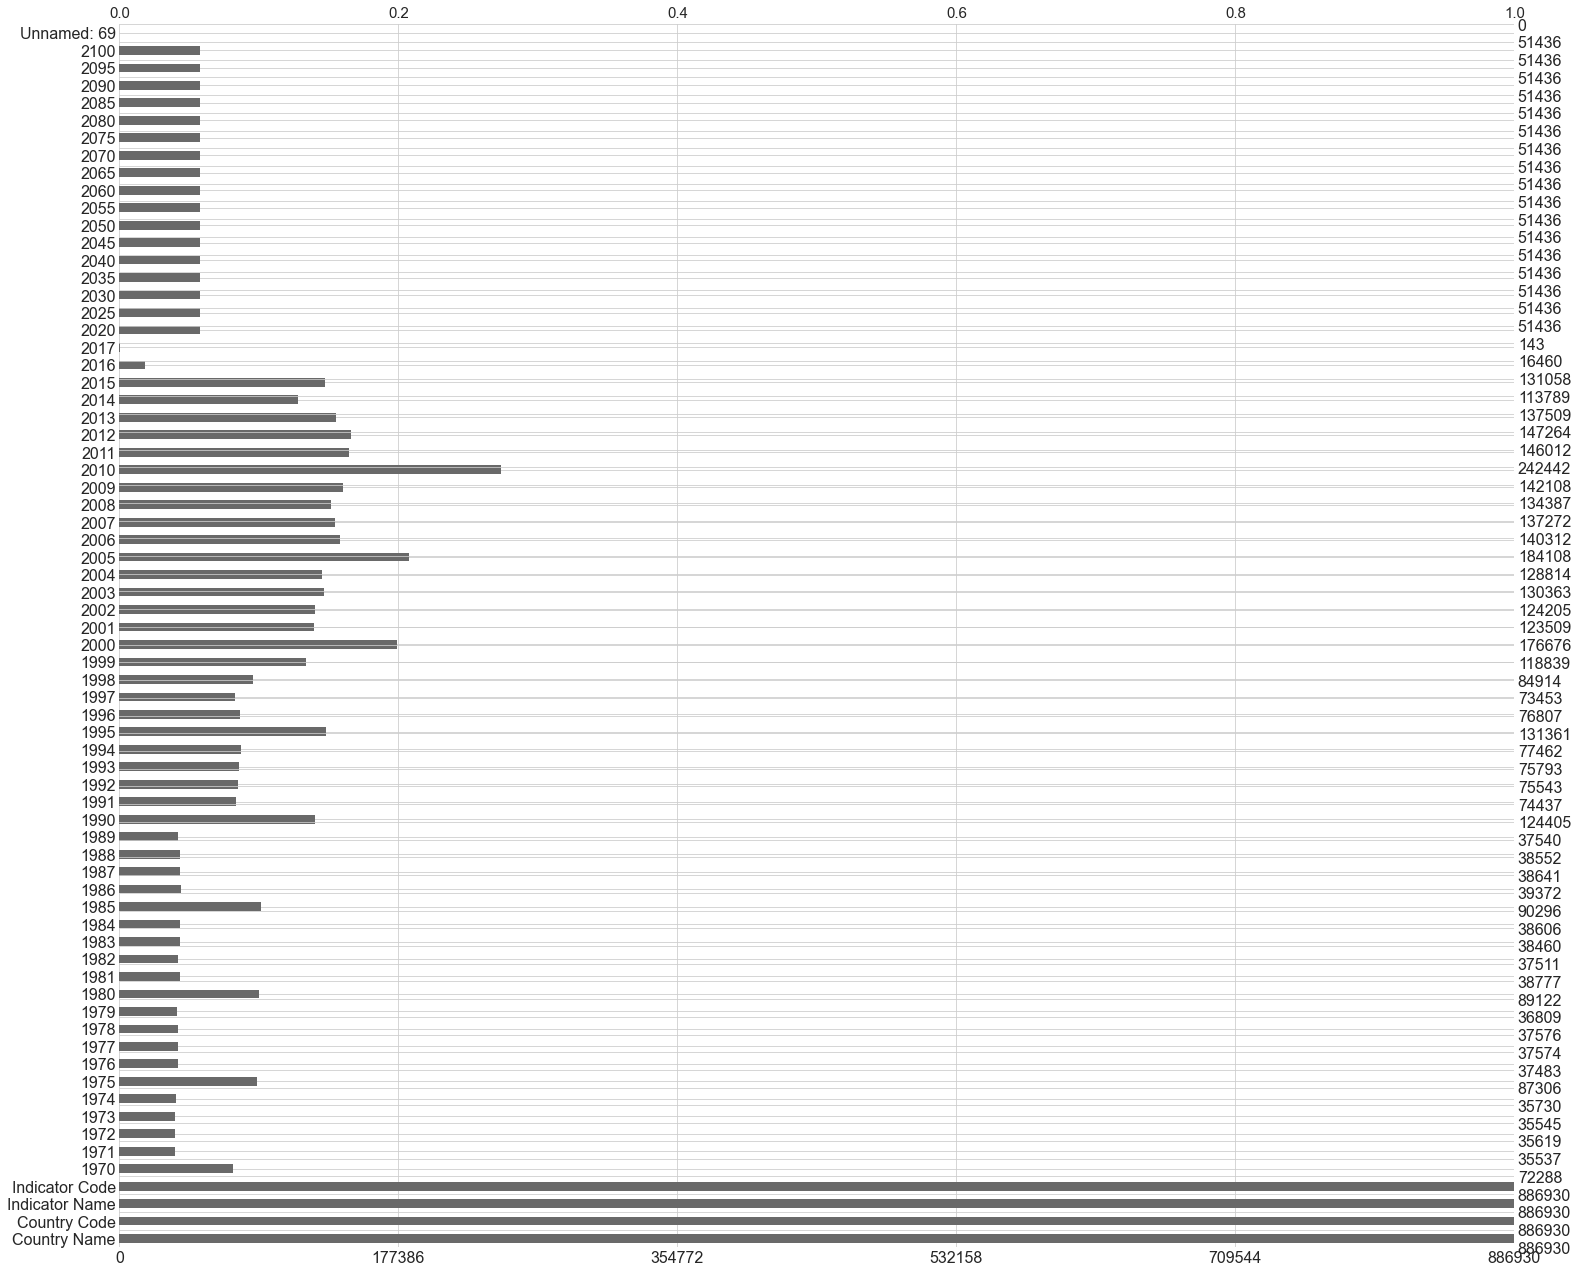

In [572]:
#localiser les valeurs manquantes sur un graphique en baton sur l'ensemble des colonnes
msno.bar(data)

<AxesSubplot:>

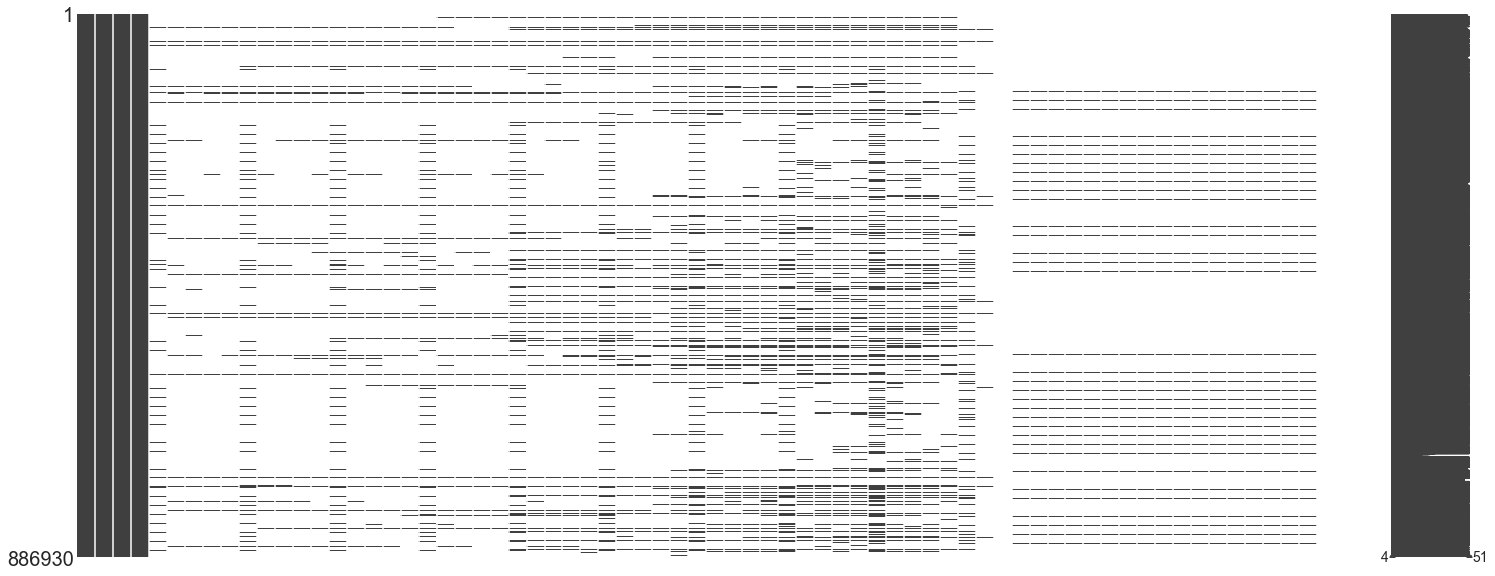

In [573]:
#localiser les valeurs manquantes sur un graphique en baton sur l'ensemble des colonnes
msno.matrix(data)

On observe qu'à partir de 2020 jusqu'à 2100, on a seulement 5,8% de données;

Les années 2016 et 2017 ont très peu de données (0,016% et 1,85% respectivement);

L'année 2010 est l'année avec le plus de donnée, à savoir 27,3%;

On constate un pic qui évolue tous les 5 ans depuis 1970 jusqu'en 2010;

La période de 2016 à 2021 comporte très peu de donnée. cette période n'est pas exploitable 
La période la plus proche permettant la meilleure exploitation des données est de 2010 à 2015.

In [724]:
# On cherche des doublons sur toutes les colonnes du dataframe
data.duplicated(keep=False).sum()

0

Il n'y a pas de doublon dans ce dataset.

### Bilan du Dataset "EdstatsData" :

-On a des données sur :

- On retrouve des informations sur les pays (nom et code), ainsi que l'evolution des indicateurs (nom et code) 
  sur la période de 1970 à 2017 (historique) et de 2020 à 2100 (données prospectives);
- On constate que dans la colonne "Country Name", on n'a pas que le nom des pays mais on retrouve, en autre,
  l'intitulé de groupe de pays (Arab World);
- Il y a 886930 lignes et 70 colonnes;
- Le taux de remplissage moyen est 13,9%;
- Il n'y a pas de doublon;
- Il y a 86% (53455179/62085100)de valeurs manquantes dans ce Dataset;
- On observe qu'on a des groupes de similitudes: 1er groupe (Indicator Code, Indicator Name, Country Name, Country 
  Code), 2ème groupe (2017, Unnamed: 69)
- La colonne "Unnamed: 20" contient aucune donnée exploitable; Il a 100% de valeurs manquantes.
- Les colonnes "Country Name", "Country Code" et "Indicator Name " et "Indicator Code" contiennent 
  aucune valeur manquante;
- On observe qu'à partir de 2020 jusqu'à 2100, on a seulement 5,8% de données (prospectives);
- Les années 2016 et 2017 ont très peu de données (0,016% et 1,85% respectivement);
- L'année 2010 est l'année avec le plus de donnée, à savoir 27,3%;
- On constate un pic qui évolue tous les 5 ans depuis 1970 jusqu'en 2010.
- Les données ont été mises à jour en 2021, ce qui correspond à l'année d'étude du projet.
- La période de 2016 à 2021 comporte tres peu de donnée. cette période n'est pas exploitable 
  pour l'étude et donc à écarter.
- La période la plus proche permettant la meilleure exploitation des données est de 2010 à 2015.

- Ce jeu de donnée dans le cadre de notre analyse pourra être gardé car il contient des informations 
  les pays (noms), l'évolution des indicateurs (noms) de 1970 à 2100 (années).

Préconisations: actions à réaliser

- Supprimer la colonne "Unnamed: 69";
- La période de 2020 à 2100 correspondent à des données prospectives ;
- La période de 2016 à 2021 n'est pas exploitable, il faudra la filtrer;
- Il faudra nettoyer ou supprimer la colonne "Country Name";

## Description du Dataset "EdStatsCountry.csv"

In [5]:
country = pd.read_csv("EdStatsCountry.csv", sep=',')
country.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [847]:
#Nombre de lignes et colonnes
country.shape

(241, 32)

Il y a 241 lignes et 32 colonnes.

In [116]:
# On regarde le type des données
country.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

On observe que le type des colonnes faisant référence à une date renvoie un float: la colonne "National accounts reference year", "Latest industrial data" et "Latest trade data".

In [840]:
#On va regarder plus en détail dans la colonne "Latest trade data" à quoi ressemble la donnée Float
country["Latest trade data"]

On observe que la colonne doit bien avoir des dates mais elle a été converti en "Float". Si on doit s'en servir, faudra nettoyer les colonnes pour les passer en objet.

In [ ]:
# On va regarder les variables quantitatives
country.describe()

On observe que le type des colonnes faisant référence à une date renvoie un float: la colonne "National accounts reference year", "Latest industrial data" et "Latest trade data".

In [ ]:
# On va regarder les variables catégoriques/qualitatives
country.describe(include="O")

On observe bien des variables catégoriques.

In [849]:
#localiser les valeurs manquantes sur l'ensemble des colonnes
msno.matrix(country)

In [548]:
# On veut avoir la moyenne des valeurs manquantes pour chaque colonne
country.isna().mean()

Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
2-alpha code                                         0.012448
Currency Unit                                        0.107884
Special Notes                                        0.398340
Region                                               0.112033
Income Group                                         0.112033
WB-2 code                                            0.004149
National accounts base year                          0.149378
National accounts reference year                     0.867220
SNA price valuation                                  0.182573
Lending category                                     0.402490
Other groups                                         0.759336
System of National Accounts                          0.107884
Alternat

On constate que les 4 premières colonnes n'ont pas de valeurs manquantes. Après la cinquième colonne (inclus), toutes les colonnes ont des valeurs manquantes à différentes moyennes. La dernière colonne "Unnamed: 31" n'a aucune donnée (100% de nan).

In [553]:
# Le taux de remplissage moyen de dataset
tx_rempl_country = 100*(1 - country.isna().mean().mean())
print("le taux de remplissage moyen du dataset EdstatsCountry " + str(tx_rempl_country))

le taux de remplissage moyen du dataset EdstatsCountry 69.47614107883817


In [ ]:
# Doublon avec toutes les colonnes du dataframe
country.duplicated(keep=False).sum()

Il n'y a pas de doublon.


### Bilan du Dataset "EdstatsCountry" :

-On a des données sur les pays (leurs indicatifs, leurs noms, leurs codes de désignation de la norme ISO, 
 leurs appartenances géographiques par région,de son groupe de revenu,etc), des données de leurs systèmes 
 économiques (au niveau agrégé), leurs dernières études, recensements, enquêtes...

- Il y a 241 lignes et 32 colonnes;
- Il n'y a pas de doublon;
- Il y a 30,52% (2354/7712)de valeurs manquantes dans ce Dataset;
- Le taux de remplissage moyen est de 69,5%;
- La colonne Unnamed:31 contient aucune donnée exploitable, il y a que des valeurs manquantes(100%);
- On observe que le type des colonnes ("National accounts reference year", "Latest industrial data" 
  et "Latest trade data") faisant référence à une date renvoie un float;
- Ce jeu de donnée dans le cadre de notre analyse pourra être gardé car il contient les informations 
  sur les noms des pays, leurs régions, leurs groupe de revenu, des données sur leurs systèmes économiques.

Préconisations: actions à réaliser

- Supprimer la colonne "Unnamed:31"
- Nettoyer les données des colonnes ("National accounts reference year", "Latest industrial data" 
  et "Latest trade data") pour passer de Float à Objet;
  

## Description du Dataset "EdStatsCountry-Series.csv"

In [6]:
country_series = pd.read_csv("EdStatsCountry-Series.csv", sep=',')
country_series.head(-5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
...,...,...,...,...
603,XKX,NY.GDP.MKTP.PP.CD,Estimates are based on regression.,NaN
604,XKX,NY.GDP.PCAP.PP.KD,Estimates are based on regression.,NaN
605,YEM,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
606,YEM,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [858]:
country_series.shape

Il y a 613 lignes et 4 colonnes.

In [569]:
country_series.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

On observe que le type des colonnes correspond bien aux types de données qu'elles contiennent.

In [860]:
# Nom des colonnes
country_series.columns

In [474]:
#les variables quantitatives
country_series.describe()

,Unnamed: 3
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


On observe que la colonne "Unnamed:3" n'a que des valeurs manquantes "Nan".

In [475]:
#les variables catégoriques/qualitatives
country_series.describe(include="O")

,CountryCode,SeriesCode,DESCRIPTION
count,613,613,613
unique,211,21,97
top,MDA,SP.POP.TOTL,Data sources : United Nations World Population...
freq,18,211,154


On observe qu'il y a 211 valeurs uniques pour la variable "Country Code" dans ce dataset alors qu'il y a en 241 valeurs uniques dans le dataset "Country" pour la même variable.
Regardons qu'elles sont ces pays?

In [867]:
country[~country['Country Code'].isin(country_series['CountryCode'])][['Short Name']].sort_values(by = 'Short Name')

Il n'y a pas que des pays mais aussi des groupements de pays, des zones géographiques, des régions, des zones économiques (Income Name).

In [869]:
#localiser les valeurs manquantes sur l'ensemble des colonnes
msno.matrix(country_series)

In [868]:
# On veut avoir la moyenne des valeurs manquantes pour chaque colonne
country_series.isna().mean()

On constate que les 3 premières colonnes n'ont pas de valeurs manquantes alors que la variable "Unnamed:3" est complètement vide et contient que des "Nan".

In [559]:
# Le taux de remplissage moyen de dataset
tx_rempl_country_series = 100*(1 - country_series.isna().mean().mean())
print("le taux de remplissage moyen du dataset EdstatsCountry-Series " + str(tx_rempl_country_series))

le taux de remplissage moyen du dataset EdstatsCountry-Series 75.0


In [738]:
# Doublon avec toutes les colonnes du dataframe
country_series.duplicated(keep=False).sum()

0

Il n'y a pas de doublon.


### Bilan du Dataset "EdstatsCountry-Series":

- On a une description des données sur le pays (nom et code) et ses sources. 

- On retrouve des informations sur les sources des données, des estimations, ...
- Il y a 613 lignes et 4 colonnes;
- Il n'y a pas de doublon;
- Il y a 25% (613/2452)de valeurs manquantes dans ce Dataset;
- Le taux de remplissage moyen est de 75%;
- La colonne "Unnamed: 3" contient aucune donnée exploitable, elle concentre toutes les valeurs manquantes(100%);
- Losqu'on regarde les variables catégoriques, on observe qu'il y a 241 valeurs uniques pour la colonne "Country Code" 
  dans le dataset "EdstatsCountry" et 211 valeurs uniques pour la colonne "Country Code"dans le dataset 
  "EdstatsCountry-Series"
  --> il y a plus de code pays dans le dataset "EdstatsCountry" que dans le dataset "EdstatsCountrySeries". On constate que ces données ne sont pas uniquement des pays mais aussi des groupements de pays, des zones géographiques, des régions, des zones économiques (Income Name).
- Ce jeu de donnée dans le cadre de notre analyse pourra être écarté car il n'est pas pertinent.

Préconisations: actions à réaliser

- Supprimer la colonne "Unnamed:3";
- Présenter l'intitulé des code pays en plus dans le jeu de donnée "EdstatsCountry";

  

## Description du Dataset "EdStatsSeries.csv"

In [7]:
series = pd.read_csv("EdStatsSeries.csv", sep=',')
series.head(-5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,UIS.XUNIT.US.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3656,UIS.XUNIT.US.56.FSGOV,Expenditures,Government expenditure per tertiary student (US$),NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3657,UIS.XUNIT.USCONST.1.FSGOV,Expenditures,Government expenditure per primary student (co...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3658,UIS.XUNIT.USCONST.2.FSGOV,Expenditures,Government expenditure per lower secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [871]:
#Nombre de lignes et colonnes
series.shape

Il y a 3665 lignes et 21 colonnes.

In [568]:
series.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

On observe que le type des colonnes correspond bien aux types de données qu'elles contiennent

In [873]:
# Nom des colonnes
series.columns

In [874]:
#les variables quantitatives
series.describe()

On observe bien des valeurs numeriques.

In [875]:
#les variables catégoriques/qualitatives
series.describe(include="O")

On observe bien des variables catégoriques.

In [878]:
#localiser les valeurs manquantes sur l'ensemble des colonnes
msno.bar(series) 

In [885]:
# On veut avoir la moyenne des valeurs manquantes pour chaque colonne
series.isna().mean()

On constate que 5 indicateurs n'ont pas de valeurs manquantes : "Series Code", "Topic","Indicator Name", "Long definition" et "Source".

In [561]:
# Le taux de remplissage moyen de dataset
tx_rempl_series = 100*(1 - series.isna().mean().mean())
print("le taux de remplissage moyen du dataset EdstatsSeries " + str(tx_rempl_series))

le taux de remplissage moyen du dataset EdstatsSeries 28.275190021438323


In [879]:
# Doublon avec toutes les colonnes du dataframe
series.duplicated(keep=False).sum()

Il n'y a pas de doublon.

In [882]:
#calcul du nombre d'occurence par sujet
series["Topic"].value_counts()

In [883]:
#calcul le nombre de sujet
series["Topic"].nunique()

Il y a 37 sujets développés dans la colonne "Topic".


### Bilan du Dataset "EdstatsSeries":

- On a des données sur la description des indicateurs (code, nom, définitions), unité de mesures et autres données:

- On retrouve des informations sur les noms des indicateurs, sur leurs définitions, sur les indicateurs 
  socio-économiques;
- Il y a 3665 lignes et 21 colonnes;
- Il n'y a pas de doublon;
- Il y a 72% (55203/76965)de valeurs manquantes dans ce Dataset;
- le taux de rempplissage moyen est de 28,3%;
- Les colonnes "Other web links", "Related indicators ","License Type", "Unnamed: 20", "Unit of measure",
  et "Notes from original source" contiennent aucune donnée exploitable;
- Les colonnes "Series Code", "Topic", "Indicator Name ", "Long definition" et "Source" 
  contiennent aucune valeur manquante;
- On a 37 sujets différents;
- Ce jeu de donnée dans le cadre de notre analyse pourra être gardé car il contient les indicateurs 
  (sujets et leurs définitions).


Préconisations: actions à réaliser

- Supprimer les colonnes "Other web links", "Related indicators ","License Type", "Unnamed: 20", "Unit of measure",
  et "Notes from original source";



## Description du Dataset "EdStatsFootNote.csv"

In [564]:
foot_note = pd.read_csv("EdStatsFootNote.csv", sep=',')
foot_note.head(-5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
...,...,...,...,...,...
643628,ZWE,SH.DYN.MORT,YR1977,Uncertainty bound is 100.3 - 118.3,NaN
643629,ZWE,SH.DYN.MORT,YR1981,Uncertainty bound is 91.4 - 107.4,NaN
643630,ZWE,SH.DYN.MORT,YR1986,Uncertainty bound is 70.8 - 82.9,NaN
643631,ZWE,SH.DYN.MORT,YR1993,Uncertainty bound is 77.2 - 90,NaN


In [887]:
#Nombre de lignes et colonnes
foot_note.shape

Il y a 643638 lignes et 5 colonnes.

In [567]:
foot_note.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

On observe que le type des colonnes correspond bien aux types de données qu'elles contiennent sauf la dernière, ou il y a apparemment que des valeurs manquantes à croiser avec le résultat de la fonction isna().

In [889]:
# Nom des colonnes
foot_note.columns

In [566]:
#les variables quantitatives
foot_note.describe()

,Unnamed: 4
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


On observe bien des valeurs numeriques.

In [891]:
#les variables catégoriques/qualitatives
foot_note.describe(include="O")

On observe bien des variables catégoriques. On observe 239 valeurs uniques dans ce dataset et 241  dans le dataset "Country" soit il y a moins de pays dans ce dataset.

In [892]:
# On cherche à lister un ensemble de variable de la même valeur(renvoie "True"), puis on regardera 
# ceux qui renvoie "False" (pays en moins)
short=country["Country Code"].isin(foot_note["CountryCode"])
inv=~short
country[inv][["Short Name"]].sort_values(by = "Short Name", ascending=False)

In [896]:
# localiser les valeurs manquantes sur l'ensemble des colonnes
msno.matrix(foot_note) 

In [895]:
# On veut avoir la moyenne des valeurs manquantes pour chaque colonne
foot_note.isna().mean()

On constate que 5 indicateurs n'ont pas de valeurs manquantes : "Series Code", "Topic","Indicator Name", "Long definition" et "Source".

In [565]:
# Le taux de remplissage moyen de dataset
tx_rempl_foot_note = 100*(1 - foot_note.isna().mean().mean())
print("le taux de remplissage moyen du dataset EdstatsFootNote " + str(tx_rempl_foot_note))

le taux de remplissage moyen du dataset EdstatsFootNote 80.0


In [897]:
# Doublon avec toutes les colonnes du dataframe
foot_note.duplicated(keep=False).sum()

Il n'y a pas de doublon.

### Bilan du Dataset "EdstatsFootNote":

- On a des informations sur le code pays, le code indicateurs, l'année et une description.

- On retrouve la description des estimations du pays, les données du pays, les limites des incertitudes et l'année;  
- Il y a 643638 lignes et 5 colonnes;
- Il n'y a pas de doublon;
- Il y a 20% (643638/3218190)de valeurs manquantes dans ce Dataset;
- Le taux de remplissage moyen est de 80%;
- La colonne Unnamed:31 contient aucune donnée exploitable, elle concentre toutes les valeurs manquantes(100%);
- Losqu'on regarde les variables catégoriques, on observe qu'il y a 241 valeurs uniques pour la colonne "Country Code" 
  dans le dataset "EdstatsCountry" et 239 valeurs uniques pour la colonne "Country Code".
  dans le dataset "EdstatsFootNote"
  --> il y a 2 codes pays qui manquent dans le dataset "EdstatsFootNote" parrapport à celui "EdstatsCountry".
- Ce jeu de donnée dans le cadre de notre analyse pourra être écarté car il n'est pas pertinent.

Préconisations: actions à réaliser

- Supprimer la colonne "Unnamed:31";
- Présenter l'intitulé des code pays en moins dans le jeu de donnée "EdstatsFootNote";

## Synthèse des datasets

Ce jeu de donnée "EdStatsData" dans le cadre de notre analyse pourra être gardé car il contient des informations 
sur les pays (noms), l'évolution des indicateurs (noms) de 1970 à 2100 (années).

Ce jeu de donnée "EdstatsCountry" dans le cadre de notre analyse pourra également être gardé car il contient les informations sur les noms des pays, leurs régions, leurs groupe de revenu, des données sur leurs systèmes économiques.

Ce jeu de donnée "EdstatsSeries" dans le cadre de notre analyse pourra être gardé car il contient les indicateurs 
(sujets et leurs définitions).
    
### ===>> On écarte donc les jeux de données "EdstatsCountry-Series" et "EdstatsFootNote".

# II/ Sélection des indicateurs et de la période de temps

### On va sélectionner les indicateurs les plus pertinents dans le cadre de la stratégie de développement à l'international de l'entreprise. La question qui faut se poser est, quelles sont les variables qui peuvent quantifier le potentiel d'un pays en vue d'un développemment commercial ? Et pour cela, on va revenir sur la cible de l'entreprise.

  ## ----------------------------Cibles de l'entreprise------------------------------------- 
  ## Les cibles doivent être normalement listées et validées avec le client. Ainsi que la pondération qui doit être faite sur chaque indicateur, on part du principe que chaque indicateur à le même poids.

## - population de niveau lycée et université; 
    # lycée : age entre 15 et 19 ans;
    # université: age entre 20 et 24 ans;
## - Formation en ligne : 
    # accès à internet et au réseau electrique;
    # accès à un ordinateur;
## - Pouvoir d'Achat:
    # Inscription scolaire
    # Niveau de vie du pays 
    # Salaire minimum/moyen
## - Culture:
    # Accès aux réseaux sociaux, médias,...

  ## ----------------------------------------------------------------------------------------

## J'utilise la base de donnée afin de rechercher les indicateurs correspondant aux cibles de l'entreprise, sur le site la banque mondiale  "https://datatopics.worldbank.org/education/indicators"

## Population  visée, de niveau lycée et université  
    # Population, ages 15-24, total
    # Population growth (annual %)
    # School age population, secondary education, both sexes (number)
    # School age population, tertiary education, both sexes (number)
## Economique --> GNI per capita, PPP (current international dollar)
    # GDP, PPP (current international dollar)
    # GNI per capita, PPP (current international dollar)
    # Human Capital Index (HCI) Score: Total (Scale 0-1)
    # Government expenditure on education, PPP (millions)
## Education 
    # Gross enrolment ratio, upper secondary, both sexes (%)
    # Gross enrolment ratio for tertiary education, both sexes (%)
    # Gross enrolment ratio for secondary education, both sexes (%)

## Moyens techniques
    # Internet users (per 100 people)
    # Personal computers (per 100 people)
    

## En filtrant la base de donnée du site de la banque mondiale de l'éducation et en cherchant sur le dataset "Series" (notamment) avec les mots clés qu'on avaient ciblé précédemment, on trouve les indicateurs, suivants: 

In [8]:
series[["Series Code","Short definition", "Indicator Name"]]

,Series Code,Short definition,Indicator Name
0,BAR.NOED.1519.FE.ZS,Percentage of female population age 15-19 with...,Barro-Lee: Percentage of female population age...
1,BAR.NOED.1519.ZS,Percentage of population age 15-19 with no edu...,Barro-Lee: Percentage of population age 15-19 ...
2,BAR.NOED.15UP.FE.ZS,Percentage of female population age 15+ with n...,Barro-Lee: Percentage of female population age...
3,BAR.NOED.15UP.ZS,Percentage of population age 15+ with no educa...,Barro-Lee: Percentage of population age 15+ wi...
4,BAR.NOED.2024.FE.ZS,Percentage of female population age 20-24 with...,Barro-Lee: Percentage of female population age...
...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,NaN,Government expenditure per upper secondary stu...
3661,UIS.XUNIT.USCONST.4.FSGOV,NaN,Government expenditure per post-secondary non-...
3662,UIS.XUNIT.USCONST.56.FSGOV,NaN,Government expenditure per tertiary student (c...
3663,XGDP.23.FSGOV.FDINSTADM.FFD,"Total general (local, regional and central) go...",Government expenditure in secondary institutio...


In [10]:
# on va filtrer par des mots clés la colonne "Series Code" ou "Indicator Name"
series[series["Indicator Name"].str.contains("15-24" and "Population" and "both sex" and "total")]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
30,BAR.POP.1519,Attainment,"Barro-Lee: Population in thousands, age 15-19,...","Population in thousands, 15-19, total is the t...","Population in thousands, age 15-19, total is t...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,BAR.POP.15UP,Attainment,"Barro-Lee: Population in thousands, age 15+, t...","Population in thousands, 15+, total is the tot...","Population in thousands, age 15+, total is the...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,BAR.POP.2024,Attainment,"Barro-Lee: Population in thousands, age 20-24,...","Population in thousands, 20-24, total is the t...","Population in thousands, age 20-24, total is t...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,BAR.POP.2529,Attainment,"Barro-Lee: Population in thousands, age 25-29,...","Population in thousands, 25-29, total is the t...","Population in thousands, age 25-29, total is t...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,BAR.POP.25UP,Attainment,"Barro-Lee: Population in thousands, age 25+, t...","Population in thousands, 25+, total is the tot...","Population in thousands, age 25+, total is the...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3631,UIS.XSpendP.56.Fdpub.Fnnons,Expenditures,Current expenditure other than staff compensat...,Current expenditure other than for staff compe...,Current expenditure other than for staff compe...,NaN,NaN,NaN,Tertiary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3632,UIS.XSPENDP.56.FDPUB.FNS,Expenditures,All staff compensation as % of total expenditu...,All staff (teacher and non-teachers) compensat...,All staff (teacher and non-teachers) compensat...,NaN,NaN,NaN,Tertiary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3633,UIS.XSPENDP.FDPUB.FNCAP,Expenditures,Capital expenditure as % of total expenditure ...,NaN,Capital expenditure expressed as a percentage ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3634,UIS.XSPENDP.FDPUB.FNNONS,Expenditures,Current expenditure other than staff compensat...,NaN,Current expenditure other than for staff compe...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# on va filtrer par des mots clés la colonne "Indicator Name"
data[data["Indicator Name"].str.contains("Population" and "15-24")]["Indicator Name"].unique()

array(['Population, ages 15-24, female', 'Population, ages 15-24, male',
       'Population, ages 15-24, total',
       'Youth illiterate population, 15-24 years, % female',
       'Youth illiterate population, 15-24 years, both sexes (number)',
       'Youth illiterate population, 15-24 years, female (number)',
       'Youth illiterate population, 15-24 years, male (number)',
       'Youth literacy rate, population 15-24 years, both sexes (%)',
       'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

# -------------------Indicateurs liés à la population visée----------------------------

### - Population, ages 15-24, total(SP.POP.1524.TO.UN):c'est la population totale (homme et femme) entre 15 et 24 ans;
### - Population growth (annual %) (SP.POP.GROW): c'est la croissance démographique en %, annuelle;

### - School age population, secondary education, both sexes (number) (SP.SEC.TOTL): c'est la population d'âge scolaire dans l'enseignement secondaire pour les deux sexes (nombre);
### - School age population, upper secondary education, both sexes (number) (SP.SEC.UTOT): c'est la population d'âge scolaire, deuxième cycle de l'enseignement secondaire pour les deux sexes (nombre);
### - School age population, tertiary education, both sexes (number (SP.TER.TOTL) : Population d'âge scolaire dans l'enseignement supérieur pour les deux sexes (nombre);

## --> Je vais écarter les indicateurs "SP.SEC.TOTL", "SP.SEC.UTOT" et "SP.TER.TOTL" car le premier indicateur sélectionné "SP.POP.1524.TO.UN" englobe ces derniers.

### Ci dessus les indicateurs liés à la population visée, on va les enregistrer dans un dataframe :

In [77]:
pop_indicateurs = ["SP.POP.1524.TO.UN", "SP.POP.GROW"]

# -Indicateurs liés aux moyens (matériels, infrastrusture et accès à l'énergie) --

### - Internet users (per 100 people) (IT.NET.USER.P2): c'est la population qui utilise internet (internaute) pour 100 personnes;
### - Personal computers (per 100 people) (IT.CMP.PCMP.P2): c'est la population qui possède un ordinateur pour 100 personnes;

## REMARQUE:
## Je n'ai pas trouvé d'indicateurs pertinents sur l'accès à l'énergie, notamment électrique(sur le site & le dataset "Series"). Il y avait uniquement des indicateurs sur "la part des lycées ayant accès à l'électricité" (pas pertinent pour la suite du projet). 

### Ci dessus les indicateurs liés aux moyens, on va les enregistrer dans un dataframe:

In [78]:
net_indicateurs=["IT.NET.USER.P2", "IT.CMP.PCMP.P2"]

# -----------Indicateurs liés aux revenus---------------

### - GDP, PPP (current international $)(NY.GDP.MKTP.PP.CD): Cet indicateur fournit des valeurs pour le revenu national brut (RNB. Anciennement PNB) exprimées en dollars internationaux courants convertis par le facteur de conversion de la parité de pouvoir d'achat (PPA).
### - GNI per capita, PPP (current international dollar) (NY.GNP.PCAP.PP.CD): c'est le PIB par habitant basé sur la parité de pouvoir d'achat (PPA). PIB PPA est le produit intérieur brut converti en dollars internationaux en utilisant les taux de parité de pouvoir d'achat.

### Ci dessus les indicateurs liés aux revenus, on va les enregistrer dans un dataframe :

In [79]:
eco_indicateurs=["NY.GDP.MKTP.PP.CD", "NY.GNP.PCAP.PP.CD"]

# -----------Indicateurs liés à l'éducation---------------

### - Gross enrolment ratio, upper secondary, both sexes(%)(SE.SEC.ENRR) : Taux brut de scolarisation, deuxième cycle du secondaire, les deux sexes (%)
### - Gross enrolment ratio for tertiary education, both sexes(%)(SE.TER.ENRR):Taux brut de scolarisation dans l'enseignement supérieur, hommes et femmes

### Ci dessus les indicateurs liés à l'éducation, on va les enregistrer dans un dataframe :

In [80]:
educa_indicateurs=["SE.SEC.ENRR", "SE.TER.ENRR"]

In [81]:
Liste_indicateurs = []
Liste_indicateurs.extend(pop_indicateurs)
Liste_indicateurs.extend(net_indicateurs)
Liste_indicateurs.extend(eco_indicateurs)
Liste_indicateurs.extend(educa_indicateurs)

Liste_indicateurs

['SP.POP.1524.TO.UN',
 'SP.POP.GROW',
 'IT.NET.USER.P2',
 'IT.CMP.PCMP.P2',
 'NY.GDP.MKTP.PP.CD',
 'NY.GNP.PCAP.PP.CD',
 'SE.SEC.ENRR',
 'SE.TER.ENRR']

## Etude des indicateurs sélectionnés sur la période de 2000 à 2020 puis par quinquennat

On va travailler sur une copie du Dataframe "data" (fichier original :EdStatsData.csv" data).

In [592]:
new_data = data.copy(deep=True)

### période : 2000 à 2020

On va regarder pour chaque indicateur sélectionné son taux de remplissage sur la période de 2000 à 2020. On va recentrer après 2000 car les années 1990 ont connu la naissance d'internet et "En France, Internet est utilisé par le grand public depuis 1994, mais n'a réellement connu un essor qu'à partir du milieu des années 2000. "(source : https://fr.wikipedia.org/wiki/Internet_en_France)

In [593]:
#On sauvegarde "new_data" avant la suppression des colonnes années qu'on veut supprimer
new_data_v0 = new_data.copy(deep=True)
#On va filtrer les colonnes qu'on supprimera
annees_v0 = list(filter(lambda x: re.match("^\d{4}$", x), new_data_v0.columns.values))
annees_supprimees_v0 = [annee for annee in annees_v0 
                                 if int(annee) < 2000 or int(annee) > 2020
                    ]
#On va supprimer ces colonnes
new_data_v0 = new_data_v0.drop(columns=annees_supprimees_v0)
#On va sélectionner les indicateurs choisis
indicateurs_valeurs_v0 = new_data_v0[new_data["Indicator Code"].isin(Liste_indicateurs)]

indicateurs_valeurs_v0  

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2020,Unnamed: 69
1249,Arab World,ARB,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,2.523213e+12,2.644195e+12,2.721095e+12,2.871734e+12,3.231080e+12,3.533460e+12,...,5.022945e+12,5.265230e+12,5.696577e+12,5.935614e+12,NaN,NaN,NaN,NaN,NaN,NaN
1252,Arab World,ARB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,8.966476e+03,9.224633e+03,9.256850e+03,9.831654e+03,1.059090e+04,1.136948e+04,...,1.428402e+04,1.499616e+04,1.584650e+04,1.614156e+04,NaN,NaN,NaN,NaN,NaN,NaN
1335,Arab World,ARB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,5.974518e+01,6.117180e+01,6.223493e+01,6.403777e+01,6.585386e+01,6.593101e+01,...,6.805088e+01,7.069149e+01,7.171656e+01,7.027469e+01,7.073505e+01,NaN,NaN,NaN,NaN,NaN
1339,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,1.816090e+01,1.876543e+01,1.956947e+01,1.955899e+01,2.069919e+01,2.173148e+01,...,2.476180e+01,2.427387e+01,2.577601e+01,2.733034e+01,2.817496e+01,NaN,NaN,NaN,NaN,NaN
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,1.139541e+00,1.561288e+00,2.693061e+00,3.645881e+00,7.006812e+00,8.393142e+00,...,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884604,Zimbabwe,ZWE,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,5.905600e+00,5.823760e+00,5.868670e+00,5.871750e+00,NaN,8.433270e+00,NaN,NaN,NaN,NaN
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,4.014335e-01,7.998460e-01,1.100000e+00,1.800000e+00,2.100000e+00,2.400000e+00,...,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01,2.274282e+01,23.119989,NaN,NaN,NaN
885349,Zimbabwe,ZWE,Personal computers (per 100 people),IT.CMP.PCMP.P2,1.559544e+00,1.588971e+00,4.746489e+00,4.892251e+00,5.514830e+00,6.687338e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885572,Zimbabwe,ZWE,Population growth (annual %),SP.POP.GROW,1.298782e+00,1.170597e+00,1.080653e+00,1.061280e+00,1.130323e+00,1.263909e+00,...,1.976756e+00,2.109672e+00,2.228306e+00,2.309366e+00,2.344799e+00,2.345643e+00,2.336070,NaN,NaN,NaN


<BarContainer object of 8 artists>

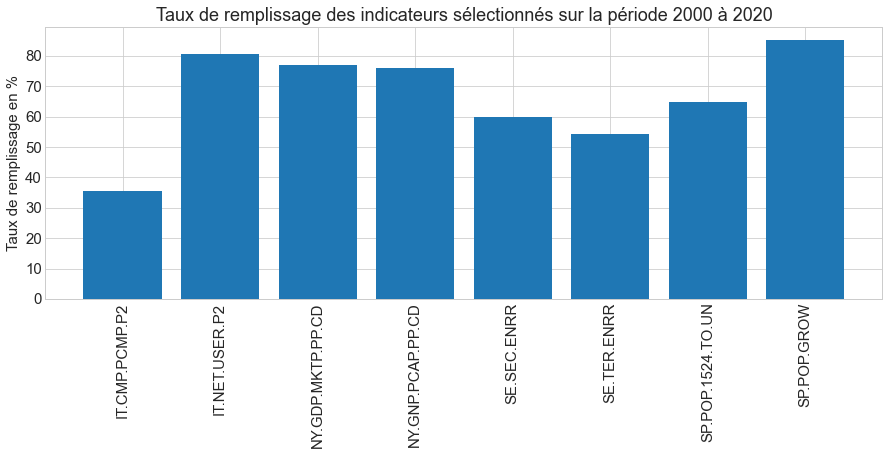

In [594]:
# On calcule le nombre de valeurs non nulles
indicateur_tx0 = (indicateurs_valeurs_v0  
                     .drop(columns=["Country Code"])
                     .set_index("Indicator Code")
                     .notnull()
                     .groupby("Indicator Code")
                     .sum())
# On multiplie par 100 et on divise par le nombre de pays
indicateur_tx0 = 100 * indicateur_tx0 / len(indicateurs_valeurs_v0["Country Code"].unique())

# On visualise ce taux avec un graphique baton 
fig2 = plt.figure(figsize=(15,5))
plt.title("Taux de remplissage des indicateurs sélectionnés sur la période 2000 à 2020")
plt.xticks(rotation = 90)
plt.ylabel("Taux de remplissage en %")
plt.bar(indicateur_tx0.index.values, indicateur_tx0.mean(axis=1))

Commentaires:

On constate que tous les indicateurs sélectionnés ont un taux de remplissage supérieur à 50% alors que l'indicateur "IT.CMP.PCMP.P2" est en dessous de ce taux à 35,36%.

### Période : 2000 à 2005

On va regarder pour chaque indicateur sélectionné son taux de remplissage sur la période de 2000 à 2005.

In [595]:
#On sauvegarde "new_data" avant la suppression des colonnes années
new_data_v1 = new_data.copy(deep=True)
#On va filtrer les colonnes qu'on supprimera
annees_v1 = list(filter(lambda x: re.match("^\d{4}$", x), new_data_v1.columns.values))
annees_supprimees_v1 = [annee for annee in annees_v1 
                                 if int(annee) < 2000 or int(annee) > 2005
                    ]
#On va supprimer ces colonnes
new_data_v1 = new_data_v1.drop(columns=annees_supprimees_v1)
#On va sélectionner les indicateurs choisis
indicateurs_valeurs_v1 = new_data_v1[new_data["Indicator Code"].isin(Liste_indicateurs)]

indicateurs_valeurs_v1 

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,Unnamed: 69
1249,Arab World,ARB,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,2.523213e+12,2.644195e+12,2.721095e+12,2.871734e+12,3.231080e+12,3.533460e+12,NaN
1252,Arab World,ARB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,8.966476e+03,9.224633e+03,9.256850e+03,9.831654e+03,1.059090e+04,1.136948e+04,NaN
1335,Arab World,ARB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,5.974518e+01,6.117180e+01,6.223493e+01,6.403777e+01,6.585386e+01,6.593101e+01,NaN
1339,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,1.816090e+01,1.876543e+01,1.956947e+01,1.955899e+01,2.069919e+01,2.173148e+01,NaN
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,1.139541e+00,1.561288e+00,2.693061e+00,3.645881e+00,7.006812e+00,8.393142e+00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
884604,Zimbabwe,ZWE,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,4.014335e-01,7.998460e-01,1.100000e+00,1.800000e+00,2.100000e+00,2.400000e+00,NaN
885349,Zimbabwe,ZWE,Personal computers (per 100 people),IT.CMP.PCMP.P2,1.559544e+00,1.588971e+00,4.746489e+00,4.892251e+00,5.514830e+00,6.687338e+00,NaN
885572,Zimbabwe,ZWE,Population growth (annual %),SP.POP.GROW,1.298782e+00,1.170597e+00,1.080653e+00,1.061280e+00,1.130323e+00,1.263909e+00,NaN


<BarContainer object of 8 artists>

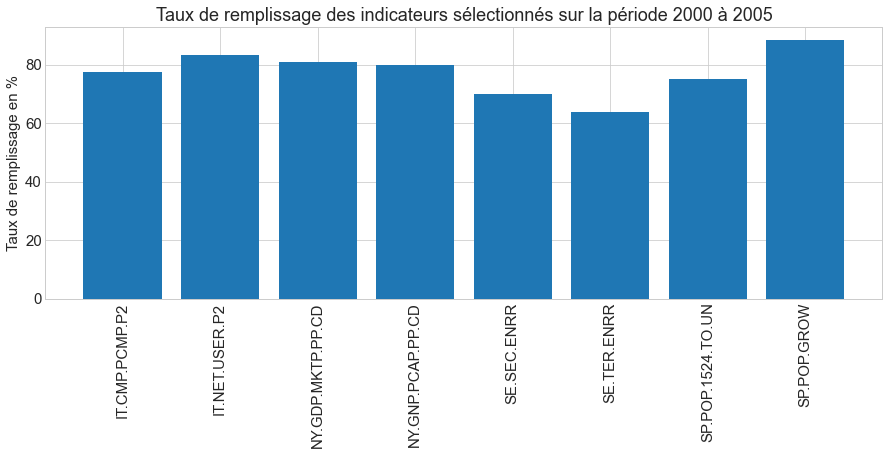

In [596]:
# On calcule le nombre de valeurs non nulles
indicateur_tx1 = (indicateurs_valeurs_v1  
                     .drop(columns=["Country Code"])
                     .set_index("Indicator Code")
                     .notnull()
                     .groupby("Indicator Code")
                     .sum())
# On multiplie par 100 et on divise par le nombre de pays
indicateur_tx1 = 100 * indicateur_tx1 / len(indicateurs_valeurs_v1["Country Code"].unique())

# On visualise ce taux avec un graphique baton 
fig2 = plt.figure(figsize=(15,5))
plt.title("Taux de remplissage des indicateurs sélectionnés sur la période 2000 à 2005")
plt.xticks(rotation = 90)
plt.ylabel("Taux de remplissage en %")
plt.bar(indicateur_tx1.index.values, indicateur_tx1.mean(axis=1))

Commentaires:

On constate que tous les indicateurs sélectionnés ont un taux de remplissage supérieur à 60%. Ils sont relativement bien remplis. Les 2 indicateurs "SE.SEC.ENRR" et "SE.TER.ENRR" avec un bon taux de remplissage, sont les 2 derniers.

### Période : 2005 à 2010

On va regarder pour chaque indicateur sélectionné son taux de remplissage sur la période de 2005 à 2010.

In [597]:
#On sauvegarde "new_data" avant la suppression des colonnes années
new_data_v2 = new_data.copy(deep=True)
#On va filtrer les colonnes qu'on supprimera
annees_v2 = list(filter(lambda x: re.match("^\d{4}$", x), new_data_v2.columns.values))
annees_supprimees_v2 = [annee for annee in annees_v2 
                                 if int(annee) < 2005 or int(annee) > 2010
                    ]
#On va supprimer ces colonnes
new_data_v2 = new_data_v2.drop(columns=annees_supprimees_v2)
#On va sélectionner les indicateurs choisis
indicateurs_valeurs_v2 = new_data_v2[new_data["Indicator Code"].isin(Liste_indicateurs)]

indicateurs_valeurs_v2 

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,Unnamed: 69
1249,Arab World,ARB,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,3.533460e+12,3.894657e+12,4.222431e+12,4.567157e+12,4.711255e+12,5.022945e+12,NaN
1252,Arab World,ARB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.136948e+04,1.235684e+04,1.313271e+04,1.382449e+04,1.385250e+04,1.428402e+04,NaN
1335,Arab World,ARB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,6.593101e+01,6.584793e+01,6.469816e+01,6.534229e+01,6.682890e+01,6.805088e+01,NaN
1339,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,2.173148e+01,2.219148e+01,2.273654e+01,2.343787e+01,2.409880e+01,2.476180e+01,NaN
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,8.393142e+00,1.165465e+01,1.420590e+01,1.859353e+01,2.297369e+01,2.674725e+01,NaN
...,...,...,...,...,...,...,...,...,...,...,...
884604,Zimbabwe,ZWE,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,5.905600e+00,NaN
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,2.400000e+00,2.400000e+00,3.000000e+00,3.500000e+00,4.000000e+00,6.400000e+00,NaN
885349,Zimbabwe,ZWE,Personal computers (per 100 people),IT.CMP.PCMP.P2,6.687338e+00,6.798012e+00,NaN,7.431140e+00,NaN,NaN,NaN
885572,Zimbabwe,ZWE,Population growth (annual %),SP.POP.GROW,1.263909e+00,1.413720e+00,1.554735e+00,1.700106e+00,1.842497e+00,1.976756e+00,NaN


<BarContainer object of 8 artists>

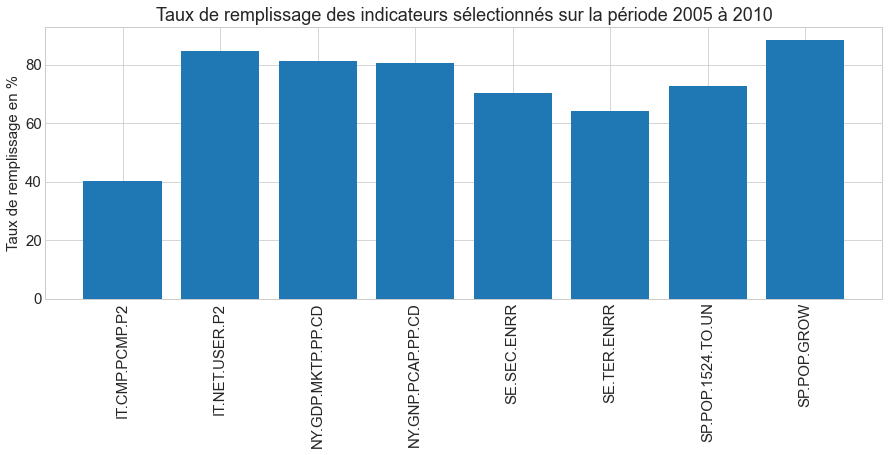

In [598]:
# On calcule le nombre de valeurs non nulles
indicateur_tx2 = (indicateurs_valeurs_v2  
                     .drop(columns=["Country Code"])
                     .set_index("Indicator Code")
                     .notnull()
                     .groupby("Indicator Code")
                     .sum())
# On multiplie par 100 et on divise par le nombre de pays
indicateur_tx2 = 100 * indicateur_tx2 / len(indicateurs_valeurs_v2["Country Code"].unique())

# On visualise ce taux avec un graphique baton 
fig2 = plt.figure(figsize=(15,5))
plt.title("Taux de remplissage des indicateurs sélectionnés sur la période 2005 à 2010")
plt.xticks(rotation = 90)
plt.ylabel("Taux de remplissage en %")
plt.bar(indicateur_tx2.index.values, indicateur_tx2.mean(axis=1))

Commentaires:

On constate que tous les indicateurs sélectionnés ont un taux de remplissage supérieur à 60% alors que l'indicateur "IT.CMP.PCMP.P2" est en dessous de ce taux à 40,22%. les 2 indicateurs "SE.SEC.ENRR" et "SE.TER.ENRR" avec un meilleur taux de remplissage, sont dans les 3 derniers.

### Période : 2010 à 2015

On va regarder pour chaque indicateur sélectionné son taux de remplissage sur la période de 2010 à 2015. la période la plus récente après celle de 2015 à 2020.

In [599]:
#On sauvegarde "new_data" avant la suppression des colonnes années
new_data_v3 = new_data.copy(deep=True)
#On va filtrer les colonnes qu'on supprimera
annees_v3 = list(filter(lambda x: re.match("^\d{4}$", x), new_data_v3.columns.values))
annees_supprimees_v3 = [annee for annee in annees_v3 
                                 if int(annee) < 2010 or int(annee) > 2015
                    ]
#On va supprimer ces colonnes
new_data_v3 = new_data_v3.drop(columns=annees_supprimees_v3)
#On va sélectionner les indicateurs choisis
indicateurs_valeurs_v3 = new_data_v3[new_data["Indicator Code"].isin(Liste_indicateurs)]

indicateurs_valeurs_v3 

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Unnamed: 69
1249,Arab World,ARB,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,5.022945e+12,5.265230e+12,5.696577e+12,5.935614e+12,NaN,NaN,NaN
1252,Arab World,ARB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.428402e+04,1.499616e+04,1.584650e+04,1.614156e+04,NaN,NaN,NaN
1335,Arab World,ARB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,6.805088e+01,7.069149e+01,7.171656e+01,7.027469e+01,7.073505e+01,NaN,NaN
1339,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,2.476180e+01,2.427387e+01,2.577601e+01,2.733034e+01,2.817496e+01,NaN,NaN
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
884604,Zimbabwe,ZWE,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,5.905600e+00,5.823760e+00,5.868670e+00,5.871750e+00,NaN,8.433270e+00,NaN
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01,2.274282e+01,NaN
885349,Zimbabwe,ZWE,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885572,Zimbabwe,ZWE,Population growth (annual %),SP.POP.GROW,1.976756e+00,2.109672e+00,2.228306e+00,2.309366e+00,2.344799e+00,2.345643e+00,NaN


<BarContainer object of 8 artists>

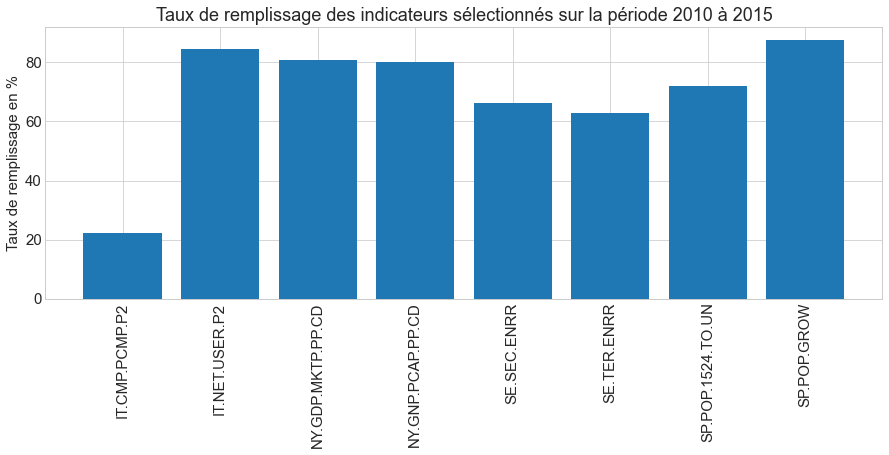

In [600]:
# On calcule le nombre de valeurs non nulles
indicateur_tx3 = (indicateurs_valeurs_v3  
                     .drop(columns=["Country Code"])
                     .set_index("Indicator Code")
                     .notnull()
                     .groupby("Indicator Code")
                     .sum())
# On multiplie par 100 et on divise par le nombre de pays
indicateur_tx3 = 100 * indicateur_tx3 / len(indicateurs_valeurs_v3["Country Code"].unique())

# On visualise ce taux avec un graphique baton 
fig2 = plt.figure(figsize=(15,5))
plt.title("Taux de remplissage des indicateurs sélectionnés sur la période 2010 à 2015")
plt.xticks(rotation = 90)
plt.ylabel("Taux de remplissage en %")
plt.bar(indicateur_tx3.index.values, indicateur_tx3.mean(axis=1))

Commentaires:

On constate que tous les indicateurs sélectionnés ont un taux de remplissage supérieur à 60% alors que l'indicateur "IT.CMP.PCMP.P2" est en dessous de ce taux à 22,22%.Les 2 indicateurs "SE.SEC.ENRR" et "SE.TER.ENRR" avec un meilleur taux de remplissage, sont dans les 3 derniers.

### Période : 2015 à 2020

On va regarder pour chaque indicateur sélectionné son taux de remplissage sur la période de 2015 à 2020. C'est la période récente qui aurait le plus de pertinence sur la qualité et la vraisemblance des données.

In [601]:
#On sauvegarde "new_data" avant la suppression des colonnes années
new_data_v4 = new_data.copy(deep=True)
#On va filtrer les colonnes qu'on supprimera
annees_v4 = list(filter(lambda x: re.match("^\d{4}$", x), new_data_v4.columns.values))
annees_supprimees_v4 = [annee for annee in annees_v4 
                                 if int(annee) < 2015 or int(annee) > 2020
                    ]
#On va supprimer ces colonnes
new_data_v4 = new_data_v4.drop(columns=annees_supprimees_v4)
#On va sélectionner les indicateurs choisis
indicateurs_valeurs_v4 = new_data_v4[new_data["Indicator Code"].isin(Liste_indicateurs)]

indicateurs_valeurs_v4 

,Country Name,Country Code,Indicator Name,Indicator Code,2015,2016,2017,2020,Unnamed: 69
1249,Arab World,ARB,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,NaN,NaN,NaN,NaN,NaN
1252,Arab World,ARB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN
1335,Arab World,ARB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN
1339,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
884604,Zimbabwe,ZWE,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,8.433270e+00,NaN,NaN,NaN,NaN
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,2.274282e+01,23.119989,NaN,NaN,NaN
885349,Zimbabwe,ZWE,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN
885572,Zimbabwe,ZWE,Population growth (annual %),SP.POP.GROW,2.345643e+00,2.336070,NaN,NaN,NaN


<BarContainer object of 8 artists>

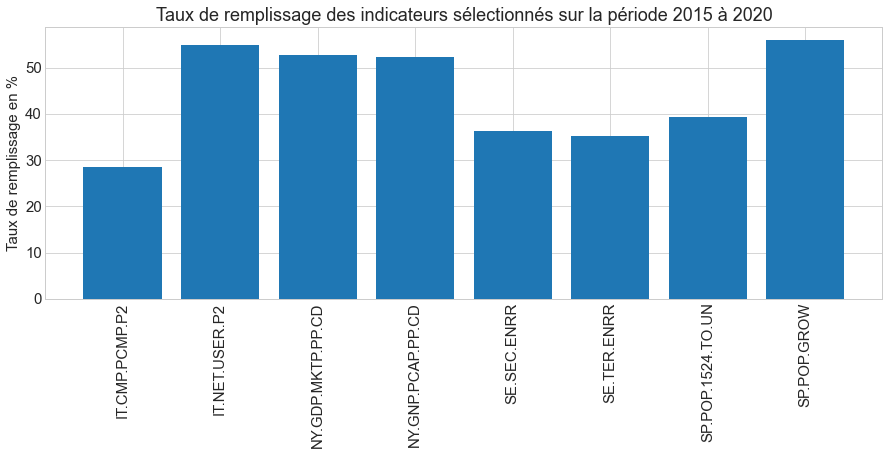

In [602]:
# On calcule le nombre de valeurs non nulles
indicateur_tx4 = (indicateurs_valeurs_v4  
                     .drop(columns=["Country Code"])
                     .set_index("Indicator Code")
                     .notnull()
                     .groupby("Indicator Code")
                     .sum())
# On multiplie par 100 et on divise par le nombre de pays
indicateur_tx4 = 100 * indicateur_tx4 / len(indicateurs_valeurs_v4["Country Code"].unique())

# On visualise ce taux avec un graphique baton 
fig2 = plt.figure(figsize=(15,5))
plt.title("Taux de remplissage des indicateurs sélectionnés sur la période 2015 à 2020")
plt.xticks(rotation = 90)
plt.ylabel("Taux de remplissage en %")
plt.bar(indicateur_tx4.index.values, indicateur_tx4.mean(axis=1))

Commentaires:

On constate que 4 indicateurs sélectionnés ont un taux de remplissage supérieur à 50% et 4 indicateurs sont en dessous de ce taux dont l'indicateur "IT.CMP.PCMP.P2","SE.SEC.ENRR" et "SE.TER.ENRR".
Avec les conclusions de l'exploration du dataset "EdstatsData, à savoir la période de 2016 à 2021 comporte très peu de donnée. Je vais écarter cette période car elle comporte peu de donnée.

## Synthèse des taux de remplissage des indicateurs sélectionnés sur les différentes périodes

Le taux de remplissage des indicateurs sélectionnés sur les différentes périodes de 2000 à 2020 reste relativement bien rempli à part pour l'indicateur "IT.CMP.PCMP.P2" qui reste toujours inférieurs à 50% et quelque soit la période. Je vais donc le supprimer.

La période de 2015 à 2020 (2015 exclus donc 2016 à 2020) sera également à supprimer car elle comporte peu de donnée exploitable. Et la période de 2000 à 2005 sera à supprimer aussi car l'essor d'internet en France pour le grand public a réellement démarré au milieu des années 2000 (source : https://fr.wikipedia.org/wiki/Internet_en_France).

### La période qu'on va conserver est de 2005 à 2015.


# III/ Filtrage des données

## Suppression des variables non utilisées 

### - Les colonnes "Country Name", "Indicator Name" et "Unnamed:69"

On va supprimer la colonne vide ("Unnamed: 69") et la colonne "Country Name" car il n'y a pas que des nom de pays 
(groupe de pays, groupe de revenu,...) et la colonne "Indicator Name" car elle ne sera pas pertinente dans la suite de notre 
analyse.

In [603]:
new_data = new_data.drop(["Country Name", "Indicator Name"], axis=1, errors="ignore")

cols_vides = [col for col in new_data.columns if new_data[col].isnull().all()]

new_data.drop(cols_vides,
        axis=1,
        inplace=True)
new_data

,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,ARB,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARB,UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARB,UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARB,UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARB,SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,ZWE,UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,ZWE,SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,ZWE,SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,ZWE,SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### joindre la colonne "Short Name" au dataframe new_data

In [604]:
new_data = new_data.merge(country[["Country Code","Short Name"]]).set_index("Country Code")                              

new_data

,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Short Name
Country Code,,,,,,,,,,,,,,,,,,,,,
ARB,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World
ARB,UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World
ARB,UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World
ARB,UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World
ARB,SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWE,UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe
ZWE,SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe
ZWE,SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe


In [605]:
new_data.columns

Index(['Indicator Code', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2020', '2025', '2030',
       '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075',
       '2080', '2085', '2090', '2095', '2100', 'Short Name'],
      dtype='object')

### On va filtrer les années (par période) qui ne sont pas pertinentes. 
Lors de la phase d'exploration, on avait souhaité garder la période de 2010 à 2015. Mais en le mettant en parallèle avec les taux de remplissages des indicateurs sélectionnés, j'ai conclus que la période de 2005 à 2015 était la plus pertinente.

In [606]:
# On sauvegarde "new_data" avant la suppression des colonnes années qu'on veut supprimer
new_data1 = new_data.copy(deep=True)
#On va filtrer les colonnes qu'on supprimera
annees = list(filter(lambda x: re.match("^\d{4}$", x), new_data1.columns.values))
annees_supprimees = [annee for annee in annees 
                                 if int(annee) < 2005 or int(annee) > 2015
                    ]
#On va supprimer ces colonnes
new_data1 = new_data1.drop(columns=annees_supprimees)

In [607]:
new_data1

,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Short Name
Country Code,,,,,,,,,,,,,
ARB,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World
ARB,UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World
ARB,UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World
ARB,UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World
ARB,SE.PRM.TENR,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,Arab World
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWE,UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.000000,NaN,Zimbabwe
ZWE,SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.428120,NaN,Zimbabwe
ZWE,SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.188350,NaN,Zimbabwe


In [375]:
new_data.index

Index(['ARB', 'ARB', 'ARB', 'ARB', 'ARB', 'ARB', 'ARB', 'ARB', 'ARB', 'ARB',
       ...
       'ZWE', 'ZWE', 'ZWE', 'ZWE', 'ZWE', 'ZWE', 'ZWE', 'ZWE', 'ZWE', 'ZWE'],
      dtype='object', name='Country Code', length=883265)

In [608]:
# On va d'abord créer un tableau avec chaque indicateur sélectionné pour chaque pays
indicateurs_valeurs = new_data1[new_data1["Indicator Code"].isin(Liste_indicateurs)]
#On va grouper le dataframe autour des colonnes "Country Code" et "Indicator Code" et calculer la moyenne le long de l’axe des colonnes
indicateurs_valeurs = indicateurs_valeurs.groupby(["Country Code","Short Name","Indicator Code"]).mean()
#la fonction mean(axis=1)calcule la moyenne le long de l’axe Row et renvoie un objet Series
indicateurs_valeurs = indicateurs_valeurs.mean(axis=1)
#convertie l'objet Serie en dataframe
indicateurs_valeurs = indicateurs_valeurs.to_frame()
#fait pivoter le niveau d'étiquette de l'index du dataframe 
indicateurs_valeurs = indicateurs_valeurs.unstack(level=2)
#Supprime l'index avec le niveau demandé
indicateurs_valeurs = indicateurs_valeurs.droplevel(0, axis=1)
indicateurs_valeurs                        

,Indicator Code,IT.CMP.PCMP.P2,IT.NET.USER.P2,NY.GDP.MKTP.PP.CD,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,SP.POP.GROW
Country Code,Short Name,,,,,,,,
ABW,Aruba,8.920613,59.149202,3.671232e+09,NaN,98.902163,29.894695,1.357318e+04,0.501860
AFG,Afghanistan,0.366026,4.203256,4.518512e+10,1533.636364,45.389368,5.440723,6.086033e+06,3.050737
AGO,Angola,0.605269,4.767579,1.342289e+11,5047.272727,26.556767,6.323648,3.759384e+06,3.543825
ALB,Albania,3.540753,38.632626,2.673871e+10,9153.636364,87.746059,43.836805,5.922224e+05,-0.450159
AND,Andorra,NaN,76.475185,NaN,NaN,NaN,NaN,8.589500e+03,0.208632
...,...,...,...,...,...,...,...,...,...
XKX,Kosovo,NaN,NaN,1.387236e+10,8203.000000,NaN,NaN,NaN,0.504025
YEM,Yemen,2.445026,12.317576,9.122477e+10,3632.727273,45.269397,10.228646,5.322463e+06,2.692212
ZAF,South Africa,8.222196,26.180016,6.097981e+11,11586.363636,91.485236,19.343977,9.791719e+06,1.430610


In [609]:
indicateurs_valeurs.columns

Index(['IT.CMP.PCMP.P2', 'IT.NET.USER.P2', 'NY.GDP.MKTP.PP.CD',
       'NY.GNP.PCAP.PP.CD', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'SP.POP.1524.TO.UN',
       'SP.POP.GROW'],
      dtype='object', name='Indicator Code')

### - Suppression des indicateurs "NY.GDP.MKTP.PP.CD","IT.CMP.PCMP.P2" et "SP.POP.GROW"

- Comme conclu précédemment,le taux de remplissage de l'indicateur "IT.CMP.PCMP.P2" est faible sur les périodes récentes à notre cas. Il n'y a peu de donnée pour cet indicateur. Cet indicateur représente "la population qui possède un ordinateur". On va le supprimer.
- On supprime l'indicateur "NY.GDP.MKTP.PP.CD" (les valeurs pour le revenu national brut) qui est moins pertinent que "NY.GNP.PCAP.PP.CD". En effet, ce dernier est le PIB par habitant par parité du pouvoir d'achat.
On supprime également l'indicateur "SP.POP.GROW" qui représente la croissance démographique en %, annuelle.

In [610]:
indicateurs_valeurs = indicateurs_valeurs.drop(columns=["NY.GDP.MKTP.PP.CD", "SP.POP.GROW","IT.CMP.PCMP.P2"])
 
indicateurs_valeurs

,Indicator Code,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
Country Code,Short Name,,,,,
ABW,Aruba,59.149202,NaN,98.902163,29.894695,1.357318e+04
AFG,Afghanistan,4.203256,1533.636364,45.389368,5.440723,6.086033e+06
AGO,Angola,4.767579,5047.272727,26.556767,6.323648,3.759384e+06
ALB,Albania,38.632626,9153.636364,87.746059,43.836805,5.922224e+05
AND,Andorra,76.475185,NaN,NaN,NaN,8.589500e+03
...,...,...,...,...,...,...
XKX,Kosovo,NaN,8203.000000,NaN,NaN,NaN
YEM,Yemen,12.317576,3632.727273,45.269397,10.228646,5.322463e+06
ZAF,South Africa,26.180016,11586.363636,91.485236,19.343977,9.791719e+06


### - Filtrage par rapport au PIB PPA de réference de la France (seuil minimum)

On va supprimer les pays qui ne sont pas pertinents :

"La littérature économique sur la taille des pays repose essentiellement sur deux critères de taille : 
la population et le PIB. A partir de ces critères, et selon les contextes,on peut vouloir distinguer 
entre « petit », « moyen », « grand » voire « géant » pays" 
(https://www.cairn.info/revue-de-l-ofce-2010-1-page-171.htm#nn2)
On va se baser sur le PIB en PPA ("NY.GDP.PCAP.PP.CD")qui tient compte des pouvoirs d'achat intérieurs dans les différents pays analysés. En se basant, sur celui de la France, le marché de référence de l'entreprise. Nous avons estimé que les pays à minima de cette référence d'environ 15%, soit au minimum de 85%. Ces pays pouvaient être visés sur le marché à l'internationale de l'entreprise. 

In [611]:
#On va calculer le PIB PPA moyen Français
ref_ppa_fra = new_data.loc["FRA",:]
ref_ppa_fra = ref_ppa_fra[ref_ppa_fra["Indicator Code"]=="NY.GDP.PCAP.PP.CD"]

ref_ppa_fra = ref_ppa_fra.mean().mean()
print ("La moyenne du PIB PPA de la France est de " + str(ref_ppa_fra))

    # nous allons calculé le palier de 85% sur la base du PIB PPA moyen Français pour être sélectionné.
pal_ppa_fra = ref_ppa_fra * 0.85
print ("La valeur minimum du PIB PPA pour entrer sur le marché Français est de " + str(pal_ppa_fra))

indicateurs_valeurs = indicateurs_valeurs[indicateurs_valeurs["NY.GNP.PCAP.PP.CD"] >= pal_ppa_fra]
print("Après sélection par le PIB PPA, il reste " + str(len(indicateurs_valeurs ))+" pays")

indicateurs_valeurs

La moyenne du PIB PPA de la France est de 29170.021036825798
La valeur minimum du PIB PPA pour entrer sur le marché Français est de 24794.517881301927
Après sélection par le PIB PPA, il reste 47 pays


,Indicator Code,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
Country Code,Short Name,,,,,
ARE,United Arab Emirates,70.899999,68392.727273,NaN,NaN,6.966785e+05
AUS,Australia,75.533792,38960.909091,133.922543,79.264152,2.893898e+06
AUT,Austria,74.253159,43181.818182,99.368819,65.388568,9.985681e+05
BEL,Belgium,73.230281,40486.363636,122.739548,67.396297,1.257487e+06
BHR,Bahrain,61.944466,38127.272727,95.384613,36.857870,1.260156e+05
BMU,Bermuda,84.501475,69881.428571,76.010968,28.733789,7.102000e+03
BRN,Brunei,53.825073,79388.181818,99.413604,20.041946,7.271827e+04
CAN,Canada,80.177273,40195.454545,103.891932,NaN,4.436876e+06
CHE,Switzerland,81.728371,54743.636364,96.852188,51.987716,9.425225e+05


On constate que certains "Country Code" sont mal renseignés dans leur intitulés "Short Code". On a des codes pays qui correspondent à un continent, à une organisation économique, à une region géographique, à groupement de revenu: OED, EUU,EMU, HIC, NAC . On fait le choix de supprimer ces "Country Code".

In [612]:
Liste_code_supp = ["EUU","OED","EMU","HIC","NAC"]
indicateurs_valeurs = indicateurs_valeurs.drop(Liste_code_supp, axis=0)

print("Après suppression des anomalies dans les codes pays , il reste " + str(len(indicateurs_valeurs ))+" pays")
indicateurs_valeurs

Après suppression des anomalies dans les codes pays , il reste 42 pays


,Indicator Code,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
Country Code,Short Name,,,,,
ARE,United Arab Emirates,70.899999,68392.727273,NaN,NaN,6.966785e+05
AUS,Australia,75.533792,38960.909091,133.922543,79.264152,2.893898e+06
AUT,Austria,74.253159,43181.818182,99.368819,65.388568,9.985681e+05
BEL,Belgium,73.230281,40486.363636,122.739548,67.396297,1.257487e+06
BHR,Bahrain,61.944466,38127.272727,95.384613,36.857870,1.260156e+05
BMU,Bermuda,84.501475,69881.428571,76.010968,28.733789,7.102000e+03
BRN,Brunei,53.825073,79388.181818,99.413604,20.041946,7.271827e+04
CAN,Canada,80.177273,40195.454545,103.891932,NaN,4.436876e+06
CHE,Switzerland,81.728371,54743.636364,96.852188,51.987716,9.425225e+05


In [684]:
#Sauvegarde de indicateurs_valeurs
indicateurs_imput = indicateurs_valeurs.copy(deep=True)

# IV/ Imputation des données manquantes

## Nettoyage des "NaN" des colonnes "Region" et "Income Group"

In [685]:
# Nettoyer les "Nan" de la colonne Région par "Non Indiqué"
country["Region"]=country["Region"].replace(np.nan,"Non Indiqué")
country["Region"].value_counts()

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Non Indiqué                   27
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [686]:
# Nettoyer les "Nan" de la colonne "Income Group" par "Non Indiqué"
country["Income Group"]=country["Income Group"].replace(np.nan,"Non Indiqué")
country["Income Group"].value_counts()

Upper middle income     55
Lower middle income     50
High income: nonOECD    44
Low income              34
High income: OECD       31
Non Indiqué             27
Name: Income Group, dtype: int64

In [687]:
indicateurs_imput.isna().mean()

Indicator Code
IT.NET.USER.P2       0.000000
NY.GNP.PCAP.PP.CD    0.000000
SE.SEC.ENRR          0.071429
SE.TER.ENRR          0.119048
SP.POP.1524.TO.UN    0.023810
dtype: float64

On constate qu'il y a des valeurs manquantes ("NaN") dans les colonnes "SE.SEC.ENRR" et "SE.TER.ENRR". Pour cela, on va utiliser la mediane de chaque colonne pour remplacer les "NaN". 

In [688]:
#calcul de la mediane de "SE.SEC.ENRR"
mediane_sec = indicateurs_imput.copy(deep=True)
mediane_sec = mediane_sec["SE.SEC.ENRR"].median(skipna = True) 
indicateurs_imput["SE.SEC.ENRR"] = indicateurs_imput["SE.SEC.ENRR"].fillna(mediane_sec)
print("la mediane de l'indicateur SE.SEC.ENRR :"+str(mediane_sec))

#calcul de la mediane de "SE.TER.ENRR"
mediane_ter = indicateurs_imput.copy(deep=True)
mediane_ter = mediane_ter["SE.TER.ENRR"].median(skipna = True) 
indicateurs_imput["SE.TER.ENRR"] = indicateurs_imput["SE.TER.ENRR"].fillna(mediane_ter)
print("la mediane de l'indicateur SE.TER.ENRR :"+str(mediane_ter))
indicateurs_imput

la mediane de l'indicateur SE.SEC.ENRR :101.13669447465391
la mediane de l'indicateur SE.TER.ENRR :63.135774439031415


,Indicator Code,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
Country Code,Short Name,,,,,
ARE,United Arab Emirates,70.899999,68392.727273,101.136694,63.135774,6.966785e+05
AUS,Australia,75.533792,38960.909091,133.922543,79.264152,2.893898e+06
AUT,Austria,74.253159,43181.818182,99.368819,65.388568,9.985681e+05
BEL,Belgium,73.230281,40486.363636,122.739548,67.396297,1.257487e+06
BHR,Bahrain,61.944466,38127.272727,95.384613,36.857870,1.260156e+05
BMU,Bermuda,84.501475,69881.428571,76.010968,28.733789,7.102000e+03
BRN,Brunei,53.825073,79388.181818,99.413604,20.041946,7.271827e+04
CAN,Canada,80.177273,40195.454545,103.891932,63.135774,4.436876e+06
CHE,Switzerland,81.728371,54743.636364,96.852188,51.987716,9.425225e+05


## Analyses statistiques des indicateurs

In [724]:
# Statistiques descriptives des indicateurs
mean_net = indicateurs_imput["IT.NET.USER.P2"].mean()
mediane_net = indicateurs_imput["IT.NET.USER.P2"].median()
var_net = indicateurs_imput["IT.NET.USER.P2"].var()
std_net = indicateurs_imput["IT.NET.USER.P2"].std()

mean_ppa = indicateurs_imput["NY.GNP.PCAP.PP.CD"].mean()
mediane_ppa = indicateurs_imput["NY.GNP.PCAP.PP.CD"].median()
var_ppa = indicateurs_imput["NY.GNP.PCAP.PP.CD"].var()
std_ppa = indicateurs_imput["NY.GNP.PCAP.PP.CD"].std()

mean_sec = indicateurs_imput["SE.SEC.ENRR"].mean()
mediane_sec = indicateurs_imput["SE.SEC.ENRR"].median()
var_sec = indicateurs_imput["SE.SEC.ENRR"].var()
std_sec = indicateurs_imput["SE.SEC.ENRR"].std()

mean_ter = indicateurs_imput["SE.TER.ENRR"].mean()
mediane_ter = indicateurs_imput["SE.TER.ENRR"].median()
var_ter = indicateurs_imput["SE.TER.ENRR"].var()
std_ter = indicateurs_imput["SE.TER.ENRR"].std()

mean_pop = indicateurs_imput["SP.POP.1524.TO.UN"].mean()
mediane_pop = indicateurs_imput["SP.POP.1524.TO.UN"].median()
var_pop = indicateurs_imput["SP.POP.1524.TO.UN"].var()
std_pop = indicateurs_imput["SP.POP.1524.TO.UN"].std()

print("Les statistiques de l'indicateur IT.NET.USER.P2 sont:\n"+ "la moyenne est "+str(mean_net))
print("La médiane est "+str(mediane_net))
print("La variance est "+str(var_net))
print("L'écart type est "+str(std_net))
print(" ")
print("Les statistiques de l'indicateur SP.POP.1524.TO.UN sont:\n"+ "la moyenne est "+str(mean_pop))
print("La médiane est "+str(mediane_pop))
print("La variance est "+str(var_pop))
print("L'écart type est "+str(std_pop))
print(" ")
print("Les statistiques de l'indicateur SE.SEC.ENRR sont:\n"+ "la moyenne est "+str(mean_sec))
print("La médiane est "+str(mediane_sec))
print("La variance est "+str(var_sec))
print("L'écart type est "+str(std_sec))
print(" ")
print("Les statistiques de l'indicateur SE.TER.ENRR sont:\n"+ "la moyenne est "+str(mean_ter))
print("La médiane est "+str(mediane_ter))
print("La variance est "+str(var_ter))
print("L'écart type est "+str(std_ter))
print(" ")
print("Les statistiques de l'indicateur NY.GNP.PCAP.PP.CD sont:\n"+ "la moyenne est "+str(mean_ppa))
print("La médiane est "+str(mediane_ppa))
print("La variance est "+str(var_ppa))
print("L'écart type est "+str(std_ppa))

indicateurs_stats = [["mean",mean_net, mean_ppa, mean_sec, mean_ter, mean_pop],
        ["median", mediane_net, mediane_ppa, mediane_sec,mediane_ter,mediane_pop],
        ["var",var_net, var_ppa, var_sec,var_ter,var_pop], 
        ["std",std_net, std_ppa,std_sec, std_ter, std_pop]]
data_stat = pd.DataFrame(indicateurs_stats,columns=["La mesure statistique","IT.NET.USER.P2","NY.GNP.PCAP.PP.CD","SE.SEC.ENRR","SE.TER.ENRR","SP.POP.1524.TO.UN"])
data_stat

Les statistiques de l'indicateur IT.NET.USER.P2 sont:
la moyenne est 69.1085037350925
La médiane est 70.942920055
La variance est 214.86821074456606
L'écart type est 14.65838363342173
 
Les statistiques de l'indicateur SP.POP.1524.TO.UN sont:
la moyenne est 3182335.130820399
La médiane est 884661.7272727273
La variance est 53026585218450.805
L'écart type est 7281935.540668484
 
Les statistiques de l'indicateur SE.SEC.ENRR sont:
la moyenne est 104.355661606846
La médiane est 101.13669447465391
La variance est 127.05545337253672
L'écart type est 11.271887746625971
 
Les statistiques de l'indicateur SE.TER.ENRR sont:
la moyenne est 61.101317291781406
La médiane est 63.135774439031415
La variance est 422.1806410946417
L'écart type est 20.547034849209794
 
Les statistiques de l'indicateur NY.GNP.PCAP.PP.CD sont:
la moyenne est 45621.2273378207
La médiane est 39805.454545454544
La variance est 378194520.18940514
L'écart type est 19447.223971287138


,La mesure statistique,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
0,mean,69.108504,4.562123e+04,104.355662,61.101317,3.182335e+06
1,median,70.942920,3.980545e+04,101.136694,63.135774,8.846617e+05
2,var,214.868211,3.781945e+08,127.055453,422.180641,5.302659e+13
3,std,14.658384,1.944722e+04,11.271888,20.547035,7.281936e+06


## Graphiques statistiques des indicateurs

/Users/saidmazzi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'SP.POP.1524.TO.UN')

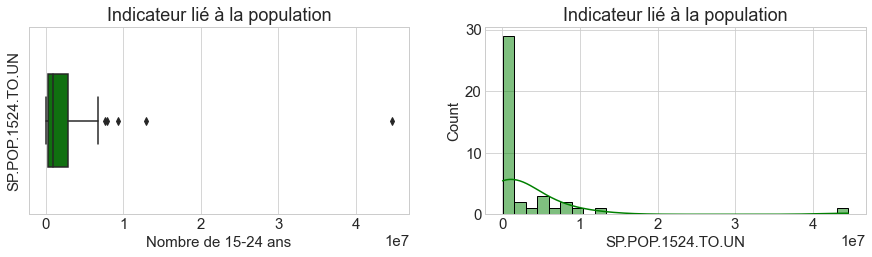

In [726]:
# Graphiques statistiques de l'indicateur démographique SP.POP.1524.TO.UN
plt.figure(figsize = (15, 20))
stats_pop=indicateurs_imput["SP.POP.1524.TO.UN"]

plt.subplot(5,2,1)
sns.boxplot(stats_pop, width=0.5, color="green")
plt.title("Indicateur lié à la population")
plt.xlabel("Nombre de 15-24 ans")
plt.ylabel("SP.POP.1524.TO.UN")
plt.subplot(5,2,2)
sns.histplot(stats_pop, kde = True, color="green")
plt.title('Indicateur lié à la population')
plt.xlabel('SP.POP.1524.TO.UN')

### -----------------------------------------------------Commentaires----------------------------------------------

On observe des outliers.

/Users/saidmazzi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'NY.GNP.PCAP.PP.CD')

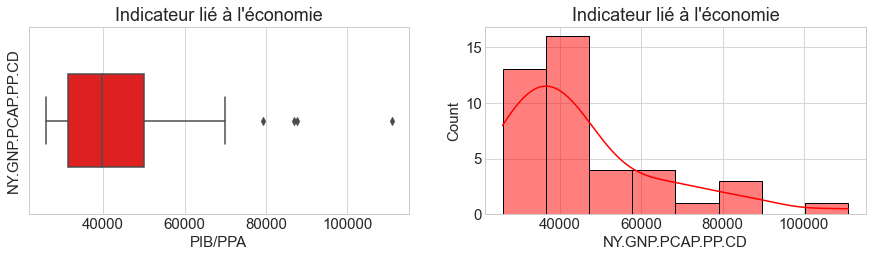

In [727]:
# Graphiques statistiques de l'indicateur économique NY.GNP.PCAP.PP.CD
plt.figure(figsize = (15, 20))
stats_ppa=indicateurs_imput["NY.GNP.PCAP.PP.CD"]

plt.subplot(5,2,1)
sns.boxplot(stats_ppa, width=0.5, color="red")
plt.title("Indicateur lié à l'économie")
plt.xlabel("PIB/PPA")
plt.ylabel("NY.GNP.PCAP.PP.CD")
plt.subplot(5,2,2)
sns.histplot(stats_ppa, kde = True, color="red")
plt.title("Indicateur lié à l'économie")
plt.xlabel("NY.GNP.PCAP.PP.CD")

### -----------------------------------------------------Commentaires----------------------------------------------
 
On observe des outliers.

/Users/saidmazzi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'IT.NET.USER.P2')

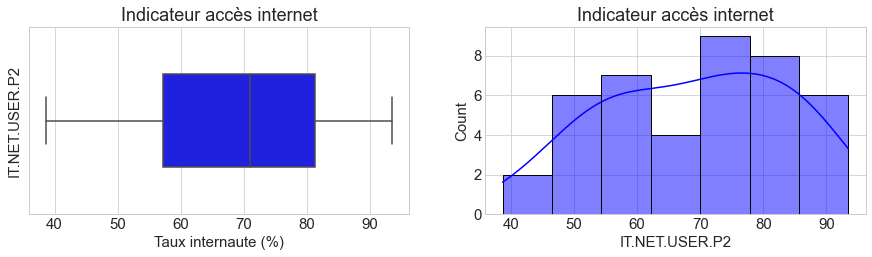

In [728]:
# Graphiques statistiques de l'indicateur de structure IT.NET.USER.P2
plt.figure(figsize = (15, 20))
stats_net=indicateurs_imput["IT.NET.USER.P2"]

plt.subplot(5,2,1)
sns.boxplot(stats_net, width=0.5, color="blue")
plt.title("Indicateur accès internet")
plt.xlabel("Taux internaute (%)")
plt.ylabel("IT.NET.USER.P2")
plt.subplot(5,2,2)
sns.histplot(stats_net, kde = True, color="blue")
plt.title("Indicateur accès internet")
plt.xlabel("IT.NET.USER.P2")

### -----------------------------------------------------Commentaires----------------------------------------------

On a une distribution bimodale (deux pics) des données issues de l'indicateur accès à internet. Le taux d'internaute le plus représentatif se concentre autour de 55% puis aux alentours de 75%.

/Users/saidmazzi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'SE.SEC.ENRR')

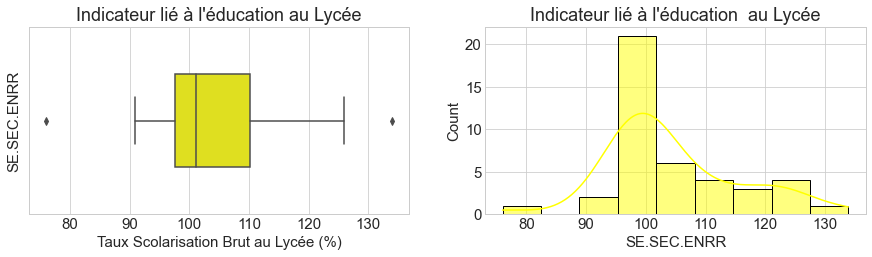

In [729]:
# Graphiques statistiques de l'indicateur lié à l'éducation SE.SEC.ENRR
plt.figure(figsize = (15, 20))
stats_sec=indicateurs_imput["SE.SEC.ENRR"]

plt.subplot(5,2,1)
sns.boxplot(stats_sec, width=0.5, color="yellow")
plt.title("Indicateur lié à l'éducation au Lycée")
plt.xlabel("Taux Scolarisation Brut au Lycée (%)")
plt.ylabel("SE.SEC.ENRR")
plt.subplot(5,2,2)
sns.histplot(stats_sec, kde = True, color="yellow")
plt.title("Indicateur lié à l'éducation  au Lycée")
plt.xlabel("SE.SEC.ENRR")

### -----------------------------------------------------Commentaires----------------------------------------------

On a des outliers.

/Users/saidmazzi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'SE.TER.ENRR')

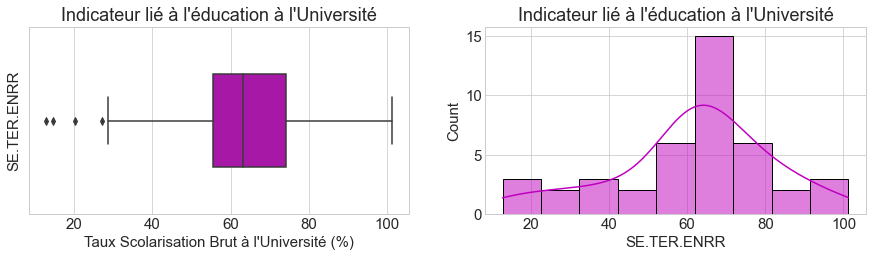

In [730]:
# Graphiques statistiques de l'indicateur lié à l'éducation SE.TER.ENRR
plt.figure(figsize = (15, 20))
stats_ter=indicateurs_imput["SE.TER.ENRR"]

plt.subplot(5,2,1)
sns.boxplot(stats_ter, width=0.5, color="m")
plt.title("Indicateur lié à l'éducation à l'Université")
plt.xlabel("Taux Scolarisation Brut à l'Université (%)")
plt.ylabel("SE.TER.ENRR")
plt.subplot(5,2,2)
sns.histplot(stats_ter, kde = True, color="m")
plt.title("Indicateur lié à l'éducation à l'Université")
plt.xlabel("SE.TER.ENRR")

### -----------------------------------------------------Commentaires----------------------------------------------

- On a des outliers;

# VI/ Création des scores

### Stratégie:

Nous allons maintenant créer des scores entre 0 et 1 pour noter les différents critères liés à nos indicateurs (1 pour le pays ayant le critère le plus élevé et 0 pour le moins élevé). 

Puis, on va attribué à chaque indicateur un coefficient afin de calculer sa somme pondéré pour avoir le pays avec le meilleur score.

On souhaite identifier les pays ayant un fort potentiel de développement commercial pour notre entreprise, donc on cherche à avoir pour chaque pays des indicateurs optimisés. voici la liste des critères que l'on recherche :

- Nombre élevé de la population pour la tranche 15-24 ans (les 2 sexes);
- Un PIB PPA élevé;
- Taux de scolarisation élevé au lycée (secondary);
- Taux de scolarisation élevé à l'université (tertiary);
- Part élevée de la population qui utilise internet;


In [624]:
# On va sauvegarder indicateur_imput
score_calcul = indicateurs_imput.copy(deep=True)
score_calcul_pond = indicateurs_imput.copy(deep=True)

## Classement sans pondération

On va créer une colonne score_pop contenant le score de la variable SP.POP.1524.TO.UN (population totale, de la tranche 15-24 pour les deux sexes)

In [625]:
score_calcul["score_pop"] = score_calcul["SP.POP.1524.TO.UN"] / score_calcul["SP.POP.1524.TO.UN"].max()

On va créer une colonne score_ppa contenant le score issu de la variable NY.GNP.PCAP.PP.CD(PIB par habitant basé sur la parité de pouvoir d'achat.

In [626]:
score_calcul["score_ppa"] = score_calcul["NY.GNP.PCAP.PP.CD"] / score_calcul["NY.GNP.PCAP.PP.CD"].max()

On va créer une colonne score_net contenant le score issu de la variable IT.NET.USER.P2 (c'est la population qui utilise internet (internaute) pour 100 personnes).

In [627]:
score_calcul["score_net"] = score_calcul["IT.NET.USER.P2"] / score_calcul["IT.NET.USER.P2"].max()

On va créer une colonne score_tx_secon contenant le score issu de la variable SE.SEC.ENRR (taux brut de scolarisation au lycée)

In [628]:
score_calcul["score_tx_secon"] = score_calcul["SE.SEC.ENRR"] / score_calcul["SE.SEC.ENRR"].max()

On va créer une colonne score_tx_tert contenant le score issu de la variable SE.SEC.ENRR (taux brut de scolarisation à l'université)

In [629]:
score_calcul["score_tx_tert"] = score_calcul["SE.TER.ENRR"] / score_calcul["SE.TER.ENRR"].max()

On va créer une colonne score_synt contenant le score issu de la somme des scores précédents.

In [630]:
score_calcul["score_synt"] = (score_calcul["score_tx_tert"]
                              +score_calcul["score_tx_secon"]
                              +score_calcul["score_pop"]
                              +score_calcul["score_ppa"]
                              + score_calcul["score_net"])

In [631]:
score_calcul = score_calcul.sort_values("score_synt",ascending=False)[["score_tx_tert","score_tx_secon","score_pop","score_ppa","score_net","score_synt"]].iloc[:10]
score_calcul

,Indicator Code,score_tx_tert,score_tx_secon,score_pop,score_ppa,score_net,score_synt
Country Code,Short Name,,,,,,
USA,United States,0.868533,0.713850,1.000000,0.456463,0.770075,3.808922
NOR,Norway,0.741130,0.842758,0.013863,0.543709,0.976058,3.117518
FIN,Finland,0.912173,0.889576,0.014609,0.352441,0.905284,3.074083
DNK,Denmark,0.775050,0.920169,0.014842,0.391101,0.956812,3.057974
AUS,Australia,0.782784,1.000000,0.064848,0.351252,0.807898,3.006782
NLD,Netherlands,0.649970,0.940226,0.044566,0.408788,0.952822,2.996371
KOR,Korea,0.938798,0.726716,0.149397,0.270252,0.881440,2.966603
ISL,Iceland,0.752713,0.823001,0.000994,0.339827,1.000000,2.916536
SWE,Sweden,0.704910,0.819089,0.026492,0.389372,0.962105,2.901967


Résultats (sans pondération)
Le classement des 10 premiers pays ayant les plus forts potentiels sont suivant le score_synt:

1er : États-Unis,

2ème : Norvège,

3ème : Finlande, 

4ème : Danemark,

5ème : Australie,

6ème : Pays-Bas,

7ème : Islande,

8ème : Suède,

9ème : Allemagne,

10ème : Japon.

#### Classement des pays suivant leur score pour chaque indicateur
On va faire un classement des pays pour chaque indicateurs.

In [632]:
score_calcul1 = score_calcul.sort_values("score_synt",ascending=False)[["score_tx_tert","score_tx_secon","score_pop","score_ppa","score_net","score_synt"]].iloc[:5]
score_calcul1

,Indicator Code,score_tx_tert,score_tx_secon,score_pop,score_ppa,score_net,score_synt
Country Code,Short Name,,,,,,
USA,United States,0.868533,0.713850,1.000000,0.456463,0.770075,3.808922
NOR,Norway,0.741130,0.842758,0.013863,0.543709,0.976058,3.117518
FIN,Finland,0.912173,0.889576,0.014609,0.352441,0.905284,3.074083
DNK,Denmark,0.775050,0.920169,0.014842,0.391101,0.956812,3.057974
AUS,Australia,0.782784,1.000000,0.064848,0.351252,0.807898,3.006782


In [633]:
# Classement suivant l'indicateur SE.TER.ENRR (éducation)
classement1 = score_calcul1.groupby("Short Name")["score_tx_tert"].sum().sort_values(ascending=False)
# Classement suivant l'indicateur SE.SEC.ENRR (éducation)
classement2 = score_calcul1.groupby("Short Name")["score_tx_secon"].sum().sort_values(ascending=False)
# Classement suivant l'indicateur IT.NET.USER.P2 (internet)
classement3 = score_calcul1.groupby("Short Name")["score_pop"].sum().sort_values(ascending=False)
# Classement suivant l'indicateur NY.GNP.PCAP.PP.CD (économique)
classement4 = score_calcul1.groupby("Short Name")["score_ppa"].sum().sort_values(ascending=False)
# Classement suivant l'indicateur SP.POP.1524.TO.UN (population)
classement5 = score_calcul1.groupby("Short Name")["score_net"].sum().sort_values(ascending=False)

print("classement par rapport au taux de scolarisation au lycée :\n"+"\n"+str(classement2))
print("")
print("classement par rapport au taux de scolarisation à l'université :\n"+"\n" +str(classement1))
print("")
print("classement par rapport à la population de 15-24 ans :\n"+"\n"+str(classement3))
print("")
print("classement par rapport au PIB PPA :\n"+"\n"+str(classement4))
print("")
print("classement par rapport à l'accès à internet :\n"+"\n"+str(classement5))


classement par rapport au taux de scolarisation au lycée :

Short Name
Australia        1.000000
Denmark          0.920169
Finland          0.889576
Norway           0.842758
United States    0.713850
Name: score_tx_secon, dtype: float64

classement par rapport au taux de scolarisation à l'université :

Short Name
Finland          0.912173
United States    0.868533
Australia        0.782784
Denmark          0.775050
Norway           0.741130
Name: score_tx_tert, dtype: float64

classement par rapport à la population de 15-24 ans :

Short Name
United States    1.000000
Australia        0.064848
Denmark          0.014842
Finland          0.014609
Norway           0.013863
Name: score_pop, dtype: float64

classement par rapport au PIB PPA :

Short Name
Norway           0.543709
United States    0.456463
Denmark          0.391101
Finland          0.352441
Australia        0.351252
Name: score_ppa, dtype: float64

classement par rapport à l'accès à internet :

Short Name
Norway           0.

#### On va regrouper ces classements par indicateur dans un dataframe

In [649]:
class_par_ind = pd.DataFrame({
    "Classement": ["1er", "2ème", "3ème", "4ème", "5ème"],
    "NY.GNP.PCAP.PP.CD": ["Norway","United States","Netherlands","Denmark","Sweden"],
    "SP.POP.1524.TO.UN": ["United States","Japan","Germany","Australia","Netherlands"],
    "SE.SEC.ENRR": ["Australia","Netherlands","Denmark","Finland","Norway"],
    "SE.TER.ENRR": ["Finland","United States","Australia","Denmark","Iceland"],
    "IT.NET.USER.P2": ["Iceland","Norway","Sweden","Denmark","Netherlands"]
})


In [650]:
class_par_ind

,Classement,NY.GNP.PCAP.PP.CD,SP.POP.1524.TO.UN,SE.SEC.ENRR,SE.TER.ENRR,IT.NET.USER.P2
0,1er,Norway,United States,Australia,Finland,Iceland
1,2ème,United States,Japan,Netherlands,United States,Norway
2,3ème,Netherlands,Germany,Denmark,Australia,Sweden
3,4ème,Denmark,Australia,Finland,Denmark,Denmark
4,5ème,Sweden,Netherlands,Norway,Iceland,Netherlands


#### On va classer ces pays selon leur occurence dans le top 5.

In [635]:
print("Avec l'indicateur NY.GNP.PCAP.PP.CD, on a ", len(class_par_ind[class_par_ind["NY.GNP.PCAP.PP.CD"]=="Finland"].value_counts()),"fois Finland dans le Top 5 du classement")
print("Avec l'indicateur SP.POP.1524.TO.UN, on a ", len(class_par_ind[class_par_ind["SP.POP.1524.TO.UN"]=="Finland"].value_counts()),"fois Finland dans le Top 5 du classement")
print("Avec l'indicateur SE.SEC.ENRR, on a       ", len(class_par_ind[class_par_ind["SE.SEC.ENRR"]=="Finland"].value_counts()),"fois Finland dans le Top 5 du classement")
print("Avec l'indicateur SE.TER.ENRR, on a       ", len(class_par_ind[class_par_ind["SE.TER.ENRR"]=="Finland"].value_counts()),"fois Finland dans le Top 5 du classement")
print("Avec l'indicateur IT.NET.USER.P2, on a    ", len(class_par_ind[class_par_ind["IT.NET.USER.P2"]=="Finland"].value_counts()),"fois Finland dans le Top 5 du classement")
print(" ")
print("Avec l'indicateur NY.GNP.PCAP.PP.CD, on a ", len(class_par_ind[class_par_ind["NY.GNP.PCAP.PP.CD"]=="United States"].value_counts()),"fois USA dans le Top 5 du classement")
print("Avec l'indicateur SP.POP.1524.TO.UN, on a ", len(class_par_ind[class_par_ind["SP.POP.1524.TO.UN"]=="United States"].value_counts()),"fois USA dans le Top 5 du classement")
print("Avec l'indicateur SE.SEC.ENRR, on a       ", len(class_par_ind[class_par_ind["SE.SEC.ENRR"]=="United States"].value_counts()),"fois USA dans le Top 5 du classement")
print("Avec l'indicateur SE.TER.ENRR, on a       ", len(class_par_ind[class_par_ind["SE.TER.ENRR"]=="United States"].value_counts()),"fois USA dans le Top 5 du classement")
print("Avec l'indicateur IT.NET.USER.P2, on a    ", len(class_par_ind[class_par_ind["IT.NET.USER.P2"]=="United States"].value_counts()),"fois USA dans le Top 5 du classement")
print(" ")
print("Avec l'indicateur NY.GNP.PCAP.PP.CD, on a ", len(class_par_ind[class_par_ind["NY.GNP.PCAP.PP.CD"]=="Australia"].value_counts()),"fois Australia dans le Top 5 du classement")
print("Avec l'indicateur SP.POP.1524.TO.UN, on a ", len(class_par_ind[class_par_ind["SP.POP.1524.TO.UN"]=="Australia"].value_counts()),"fois Australia dans le Top 5 du classement")
print("Avec l'indicateur SE.SEC.ENRR, on a       ", len(class_par_ind[class_par_ind["SE.SEC.ENRR"]=="Australia"].value_counts()),"fois Australia dans le Top 5 du classement")
print("Avec l'indicateur SE.TER.ENRR, on a       ", len(class_par_ind[class_par_ind["SE.TER.ENRR"]=="Australia"].value_counts()),"fois Australia dans le Top 5 du classement")
print("Avec l'indicateur IT.NET.USER.P2, on a    ", len(class_par_ind[class_par_ind["IT.NET.USER.P2"]=="Australia"].value_counts()),"fois Australia dans le Top 5 du classement")
print(" ")
print("Avec l'indicateur NY.GNP.PCAP.PP.CD, on a ", len(class_par_ind[class_par_ind["NY.GNP.PCAP.PP.CD"]=="Iceland"].value_counts()),"fois Iceland dans le Top 5 du classement")
print("Avec l'indicateur SP.POP.1524.TO.UN, on a ", len(class_par_ind[class_par_ind["SP.POP.1524.TO.UN"]=="Iceland"].value_counts()),"fois Iceland dans le Top 5 du classement")
print("Avec l'indicateur SE.SEC.ENRR, on a       ", len(class_par_ind[class_par_ind["SE.SEC.ENRR"]=="Iceland"].value_counts()),"fois Iceland dans le Top 5 du classement")
print("Avec l'indicateur SE.TER.ENRR, on a       ", len(class_par_ind[class_par_ind["SE.TER.ENRR"]=="Iceland"].value_counts()),"fois Iceland dans le Top 5 du classement")
print("Avec l'indicateur IT.NET.USER.P2, on a    ", len(class_par_ind[class_par_ind["IT.NET.USER.P2"]=="Iceland"].value_counts()),"fois Iceland dans le Top 5 du classement")
print(" ")
print("Avec l'indicateur NY.GNP.PCAP.PP.CD, on a ", len(class_par_ind[class_par_ind["NY.GNP.PCAP.PP.CD"]=="Norway"].value_counts()),"fois Norway dans le Top 5 du classement")
print("Avec l'indicateur SP.POP.1524.TO.UN, on a ", len(class_par_ind[class_par_ind["SP.POP.1524.TO.UN"]=="Norway"].value_counts()),"fois Norway dans le Top 5 du classement")
print("Avec l'indicateur SE.SEC.ENRR, on a       ", len(class_par_ind[class_par_ind["SE.SEC.ENRR"]=="Norway"].value_counts()),"fois Norway dans le Top 5 du classement")
print("Avec l'indicateur SE.TER.ENRR, on a       ", len(class_par_ind[class_par_ind["SE.TER.ENRR"]=="Norway"].value_counts()),"fois Norway dans le Top 5 du classement")
print("Avec l'indicateur IT.NET.USER.P2, on a    ", len(class_par_ind[class_par_ind["IT.NET.USER.P2"]=="Norway"].value_counts()),"fois Norway dans le Top 5 du classement")
print(" ")
print("Avec l'indicateur NY.GNP.PCAP.PP.CD, on a ", len(class_par_ind[class_par_ind["NY.GNP.PCAP.PP.CD"]=="Denmark"].value_counts()),"fois Denmark dans le Top 5 du classement")
print("Avec l'indicateur SP.POP.1524.TO.UN, on a ", len(class_par_ind[class_par_ind["SP.POP.1524.TO.UN"]=="Denmark"].value_counts()),"fois Denmark dans le Top 5 du classement")
print("Avec l'indicateur SE.SEC.ENRR, on a       ", len(class_par_ind[class_par_ind["SE.SEC.ENRR"]=="Denmark"].value_counts()),"fois Denmark dans le Top 5 du classement")
print("Avec l'indicateur SE.TER.ENRR, on a       ", len(class_par_ind[class_par_ind["SE.TER.ENRR"]=="Denmark"].value_counts()),"fois Denmark dans le Top 5 du classement")
print("Avec l'indicateur IT.NET.USER.P2, on a    ", len(class_par_ind[class_par_ind["IT.NET.USER.P2"]=="Denmark"].value_counts()),"fois Denmark dans le Top 5 du classement")
print(" ")
print("Avec l'indicateur NY.GNP.PCAP.PP.CD, on a ", len(class_par_ind[class_par_ind["NY.GNP.PCAP.PP.CD"]=="Sweden"].value_counts()),"fois Sweden dans le Top 5 du classement")
print("Avec l'indicateur SP.POP.1524.TO.UN, on a ", len(class_par_ind[class_par_ind["SP.POP.1524.TO.UN"]=="Sweden"].value_counts()),"fois Sweden dans le Top 5 du classement")
print("Avec l'indicateur SE.SEC.ENRR, on a       ", len(class_par_ind[class_par_ind["SE.SEC.ENRR"]=="Sweden"].value_counts()),"fois Sweden dans le Top 5 du classement")
print("Avec l'indicateur SE.TER.ENRR, on a       ", len(class_par_ind[class_par_ind["SE.TER.ENRR"]=="Sweden"].value_counts()),"fois Sweden dans le Top 5 du classement")
print("Avec l'indicateur IT.NET.USER.P2, on a    ", len(class_par_ind[class_par_ind["IT.NET.USER.P2"]=="Sweden"].value_counts()),"fois Sweden dans le Top 5 du classement")
print(" ")
print("Avec l'indicateur NY.GNP.PCAP.PP.CD, on a ", len(class_par_ind[class_par_ind["NY.GNP.PCAP.PP.CD"]=="Netherlands"].value_counts()),"fois Netherlands dans le Top 5 du classement")
print("Avec l'indicateur SP.POP.1524.TO.UN, on a ", len(class_par_ind[class_par_ind["SP.POP.1524.TO.UN"]=="Netherlands"].value_counts()),"fois Netherlands dans le Top 5 du classement")
print("Avec l'indicateur SE.SEC.ENRR, on a       ", len(class_par_ind[class_par_ind["SE.SEC.ENRR"]=="Netherlands"].value_counts()),"fois Netherlands dans le Top 5 du classement")
print("Avec l'indicateur SE.TER.ENRR, on a       ", len(class_par_ind[class_par_ind["SE.TER.ENRR"]=="Netherlands"].value_counts()),"fois Netherlands dans le Top 5 du classement")
print("Avec l'indicateur IT.NET.USER.P2, on a    ", len(class_par_ind[class_par_ind["IT.NET.USER.P2"]=="Netherlands"].value_counts()),"fois Netherlands dans le Top 5 du classement")
print(" ")
print("Avec l'indicateur NY.GNP.PCAP.PP.CD, on a ", len(class_par_ind[class_par_ind["NY.GNP.PCAP.PP.CD"]=="Germany"].value_counts()),"fois Germany dans le Top 5 du classement")
print("Avec l'indicateur SP.POP.1524.TO.UN, on a ", len(class_par_ind[class_par_ind["SP.POP.1524.TO.UN"]=="Germany"].value_counts()),"fois Germany dans le Top 5 du classement")
print("Avec l'indicateur SE.SEC.ENRR, on a       ", len(class_par_ind[class_par_ind["SE.SEC.ENRR"]=="Germany"].value_counts()),"fois Germany dans le Top 5 du classement")
print("Avec l'indicateur SE.TER.ENRR, on a       ", len(class_par_ind[class_par_ind["SE.TER.ENRR"]=="Germany"].value_counts()),"fois Germany dans le Top 5 du classement")
print("Avec l'indicateur IT.NET.USER.P2, on a    ", len(class_par_ind[class_par_ind["IT.NET.USER.P2"]=="Germany"].value_counts()),"fois Germany dans le Top 5 du classement")
print(" ")
print("Avec l'indicateur NY.GNP.PCAP.PP.CD, on a ", len(class_par_ind[class_par_ind["NY.GNP.PCAP.PP.CD"]=="Japan"].value_counts()),"fois Japan dans le Top 5 du classement")
print("Avec l'indicateur SP.POP.1524.TO.UN, on a ", len(class_par_ind[class_par_ind["SP.POP.1524.TO.UN"]=="Japan"].value_counts()),"fois Japan dans le Top 5 du classement")
print("Avec l'indicateur SE.SEC.ENRR, on a       ", len(class_par_ind[class_par_ind["SE.SEC.ENRR"]=="Japan"].value_counts()),"fois Japan dans le Top 5 du classement")
print("Avec l'indicateur SE.TER.ENRR, on a       ", len(class_par_ind[class_par_ind["SE.TER.ENRR"]=="Japan"].value_counts()),"fois Japan dans le Top 5 du classement")
print("Avec l'indicateur IT.NET.USER.P2, on a    ", len(class_par_ind[class_par_ind["IT.NET.USER.P2"]=="Japan"].value_counts()),"fois Japan dans le Top 5 du classement")
print(" ")

Avec l'indicateur NY.GNP.PCAP.PP.CD, on a  0 fois Finland dans le Top 5 du classement
Avec l'indicateur SP.POP.1524.TO.UN, on a  0 fois Finland dans le Top 5 du classement
Avec l'indicateur SE.SEC.ENRR, on a        1 fois Finland dans le Top 5 du classement
Avec l'indicateur SE.TER.ENRR, on a        1 fois Finland dans le Top 5 du classement
Avec l'indicateur IT.NET.USER.P2, on a     0 fois Finland dans le Top 5 du classement
 
Avec l'indicateur NY.GNP.PCAP.PP.CD, on a  1 fois USA dans le Top 5 du classement
Avec l'indicateur SP.POP.1524.TO.UN, on a  1 fois USA dans le Top 5 du classement
Avec l'indicateur SE.SEC.ENRR, on a        0 fois USA dans le Top 5 du classement
Avec l'indicateur SE.TER.ENRR, on a        1 fois USA dans le Top 5 du classement
Avec l'indicateur IT.NET.USER.P2, on a     0 fois USA dans le Top 5 du classement
 
Avec l'indicateur NY.GNP.PCAP.PP.CD, on a  0 fois Australia dans le Top 5 du classement
Avec l'indicateur SP.POP.1524.TO.UN, on a  1 fois Australia dans le 

In [636]:
# On classe dans un dataframe
class_par_ind = pd.DataFrame({
    "Classement": ["1er", "2ème", "3ème", "4ème"],
    "Top 5": ["4 fois","3 fois","2 fois","1 fois"],
    "Pays": ["Denmark et Netherlands","United States et Australia et Norway","Finland et Iceland et Sweden","Germany et Japan"],
   
})
print("Ci dessous le classement des pays avec le plus de récurrence dans le top5, n" +class_par_ind)

                                          Classement  \
0  Ci dessous le classement des pays avec le plus...   
1  Ci dessous le classement des pays avec le plus...   
2  Ci dessous le classement des pays avec le plus...   
3  Ci dessous le classement des pays avec le plus...   

                                               Top 5  \
0  Ci dessous le classement des pays avec le plus...   
1  Ci dessous le classement des pays avec le plus...   
2  Ci dessous le classement des pays avec le plus...   
3  Ci dessous le classement des pays avec le plus...   

                                                Pays  
0  Ci dessous le classement des pays avec le plus...  
1  Ci dessous le classement des pays avec le plus...  
2  Ci dessous le classement des pays avec le plus...  
3  Ci dessous le classement des pays avec le plus...  


Si on croise le premier classement qui était basé sur le plus fort potentiel  suivant la somme (sans pondération) des scores (taux des indicateurs) et celui (ci-dessus) qui classe les pays suivant leur récurrence dans le Top 5, on peut constater que les pays qui apparaissent souvent dans le Top 5 (voir Top 6) de chaque indicateur et dans le classement initial :
        Pays       récurrence
1er : États-Unis,      3 

2ème : Norvège,        3

3ème : Finlande,       2

4ème : Danemark,       4

5ème : Australie,      3

6ème : Pays-Bas,       4

## Classement avec pondération

Il y a plusieurs méthodologies de pondération (Ternaire, Borda,	par pondération par capital de points (vote cumulatif) et par pondération financière). On choisit la méthode Borda, la pondération se fait à partir du classement, par indicateur, de tous les pays restants.
En concertation avec le client, on définit pour chaque indicateur sélectionné un coefficient de pondération, suivant son importance et la stratégie de l'entreprise.

Population totale des 15-24 ans (SP.POP.1524.TO.UN)       --> coef:4

Le PIB en parite du Pouvoir d'Achat (BNY.GNP.PCAP.PP.CD)  --> coef:2

taux de scolarisation Brut au Lycée (SE.SEC.ENRR)	      --> coef:1

taux de scolarisation Brut à l'université (SE.TER.ENRR)   --> coef:3

Le taux d'accès à internet (IT.NET.USER.P2)	              --> coef:5


On va créer une colonne score_pop contenant le score de la variable SP.POP.1524.TO.UN (population totale, de la tranche 15-24 pour les deux sexes)

In [637]:
score_calcul_pond["score_pop"] = score_calcul_pond["SP.POP.1524.TO.UN"] / score_calcul_pond["SP.POP.1524.TO.UN"].max()

On va créer une colonne score_ppa contenant le score issu de la variable NY.GNP.PCAP.PP.CD(PIB par habitant basé sur la parité de pouvoir d'achat.

In [638]:
score_calcul_pond["score_ppa"] = score_calcul_pond["NY.GNP.PCAP.PP.CD"] / score_calcul_pond["NY.GNP.PCAP.PP.CD"].max()

On va créer une colonne score_net contenant le score issu de la variable IT.NET.USER.P2 (c'est la population qui utilise internet (internaute) pour 100 personnes).

In [639]:
score_calcul_pond["score_net"] = score_calcul_pond["IT.NET.USER.P2"] / score_calcul_pond["IT.NET.USER.P2"].max()

On va créer une colonne score_tx_secon contenant le score issu de la variable SE.SEC.ENRR (taux brut de scolarisation au lycée)

In [640]:
score_calcul_pond["score_tx_secon"] = score_calcul_pond["SE.SEC.ENRR"] / score_calcul_pond["SE.SEC.ENRR"].max()

On va créer une colonne score_tx_tert contenant le score issu de la variable SE.SEC.ENRR (taux brut de scolarisation à l'université)

In [641]:
score_calcul_pond["score_tx_tert"] = score_calcul_pond["SE.TER.ENRR"] / score_calcul_pond["SE.TER.ENRR"].max()

On va créer une colonne score_synt contenant le score issu de la somme des scores avec le coefficient de pondération défini précédemment.

In [642]:
score_calcul_pond["score_synt"] =   ((score_calcul_pond["score_tx_tert"]*3) 
                                   + (score_calcul_pond["score_tx_secon"]*1) 
                                   + (score_calcul_pond["score_pop"]*4) 
                                   + (score_calcul_pond["score_ppa"]*2)
                                   + (score_calcul_pond["score_net"]*5))

In [643]:
score_calcul_pond = score_calcul_pond.sort_values("score_synt",ascending=False)[["score_tx_tert","score_tx_secon","score_pop","score_ppa","score_net","score_synt"]].iloc[:10]
score_calcul_pond

,Indicator Code,score_tx_tert,score_tx_secon,score_pop,score_ppa,score_net,score_synt
Country Code,Short Name,,,,,,
USA,United States,0.868533,0.713850,1.000000,0.456463,0.770075,12.082750
NOR,Norway,0.741130,0.842758,0.013863,0.543709,0.976058,9.089308
KOR,Korea,0.938798,0.726716,0.149397,0.270252,0.881440,9.088403
FIN,Finland,0.912173,0.889576,0.014609,0.352441,0.905284,8.915835
DNK,Denmark,0.775050,0.920169,0.014842,0.391101,0.956812,8.870949
ISL,Iceland,0.752713,0.823001,0.000994,0.339827,1.000000,8.764772
NLD,Netherlands,0.649970,0.940226,0.044566,0.408788,0.952822,8.650086
SWE,Sweden,0.704910,0.819089,0.026492,0.389372,0.962105,8.629053
JPN,Japan,0.583098,0.756270,0.288001,0.332475,0.844438,8.544710


Résultats (avec la pondération)
Le classement des 10 premiers pays ayant les plus forts potentiels, sont suivant le score_synt:

1er : États-Unis, 
2ème : Norvège, 
3ème : Finlande, 
4ème : Danemark,
5ème : Islande, 
6ème : Pays-Bas, 
7ème : Suède, 
8ème : Allemagne, 
9ème : Japon,
10ème : Australie.

#### Conclusion,

Le top 10 des pays avec un fort potentiel commercial pour le client sont:
États-Unis, 
2ème : Norvège, 
3ème : Finlande, 
4ème : Danemark,
5ème : Islande, 
6ème : Pays-Bas, 
7ème : Suède, 
8ème : Allemagne, 
9ème : Japon,
10ème : Australie.

### Classement prédictif

On va utiliser le fichier edstatsData.csv et exploiter les données entre 2020 et 2100, en gardant la même pondération, pour avoir avoir la prédiction des pays.

In [682]:
# On sauvegarde "new_data" avant la suppression des colonnes années qu'on veut supprimer
new_data_pred = new_data.copy(deep=True)
#On va filtrer les colonnes qu'on supprimera
annees_pred = list(filter(lambda x: re.match("^\d{4}$", x), new_data_pred.columns.values))
annees_supprimees_pred = [annee for annee in annees_pred 
                                 if int(annee) < 2020 or int(annee) > 2100
                    ]
#On va supprimer ces colonnes
new_data_pred = new_data_pred.drop(columns=annees_supprimees)

# On va d'abord créer un tableau avec chaque indicateur sélectionné pour chaque pays
indicateurs_valeurs_pred = new_data_pred[new_data_pred["Indicator Code"].isin(Liste_indicateurs)]
#On va grouper le dataframe autour des colonnes "Country Code" et "Indicator Code" et calculer la moyenne le long de l’axe des colonnes
indicateurs_valeurs_pred = indicateurs_valeurs_pred.groupby(["Country Code","Short Name","Indicator Code"]).mean()
#la fonction mean(axis=1)calcule la moyenne le long de l’axe Row et renvoie un objet Series
indicateurs_valeurs_pred = indicateurs_valeurs_pred.mean(axis=1)
#convertie l'objet Serie en dataframe
indicateurs_valeurs_pred = indicateurs_valeurs_pred.to_frame()
#fait pivoter le niveau d'étiquette de l'index du dataframe 
indicateurs_valeurs_pred = indicateurs_valeurs_pred.unstack(level=2)
#Supprime l'index avec le niveau demandé
indicateurs_valeurs_pred = indicateurs_valeurs_pred.droplevel(0, axis=1)

indicateurs_valeurs_pred = indicateurs_valeurs_pred.drop(columns=["NY.GDP.MKTP.PP.CD", "SP.POP.GROW","IT.CMP.PCMP.P2"])
 
#On va calculer le PIB PPA moyen Français
ref_ppa_fra_pred = new_data.loc["FRA",:]
ref_ppa_fra_pred = ref_ppa_fra_pred[ref_ppa_fra_pred["Indicator Code"]=="NY.GDP.PCAP.PP.CD"]

ref_ppa_fra_pred = ref_ppa_fra_pred.mean().mean()
print ("La moyenne du PIB PPA de la France est de " + str(ref_ppa_fra_pred))

    # nous allons calculé le palier de 85% sur la base du PIB PPA moyen Français pour être sélectionné.
pal_ppa_fra_pred = ref_ppa_fra_pred * 0.85
print ("La valeur minimum du PIB PPA pour entrer sur le marché Français est de " + str(pal_ppa_fra_pred))

indicateurs_valeurs_pred = indicateurs_valeurs_pred[indicateurs_valeurs_pred["NY.GNP.PCAP.PP.CD"] >= pal_ppa_fra_pred]
print("Après sélection par le PIB PPA, il reste " + str(len(indicateurs_valeurs_pred ))+" pays")

Liste_code_supp_pred = ["EUU","OED","EMU","HIC","NAC"]
indicateurs_valeurs_pred = indicateurs_valeurs_pred.drop(Liste_code_supp_pred, axis=0)

print("Après suppression des anomalies dans les codes pays , il reste " + str(len(indicateurs_valeurs_pred ))+" pays")

#Sauvegarde de indicateurs_valeurs
indicateurs_imput_pred = indicateurs_valeurs_pred.copy(deep=True)

#calcul de la mediane de "SE.SEC.ENRR"
mediane_sec_pred = indicateurs_imput_pred.copy(deep=True)
mediane_sec_pred = mediane_sec_pred["SE.SEC.ENRR"].median(skipna = True) 
indicateurs_imput_pred["SE.SEC.ENRR"] = indicateurs_imput_pred["SE.SEC.ENRR"].fillna(mediane_sec)
print("la mediane de l'indicateur SE.SEC.ENRR :"+str(mediane_sec_pred))

#calcul de la mediane de "SE.TER.ENRR"
mediane_ter_pred = indicateurs_imput_pred.copy(deep=True)
mediane_ter_pred = mediane_ter_pred["SE.TER.ENRR"].median(skipna = True) 
indicateurs_imput_pred["SE.TER.ENRR"] = indicateurs_imput_pred["SE.TER.ENRR"].fillna(mediane_ter)
print("la mediane de l'indicateur SE.TER.ENRR :"+str(mediane_ter_pred))

# On va sauvegarder indicateur_imput
score_calcul_pond_pred = indicateurs_imput_pred.copy(deep=True)

score_calcul_pond_pred["score_pop"] = score_calcul_pond_pred["SP.POP.1524.TO.UN"] / score_calcul_pond_pred["SP.POP.1524.TO.UN"].max()
score_calcul_pond_pred["score_ppa"] = score_calcul_pond_pred["NY.GNP.PCAP.PP.CD"] / score_calcul_pond_pred["NY.GNP.PCAP.PP.CD"].max()
score_calcul_pond_pred["score_net"] = score_calcul_pond_pred["IT.NET.USER.P2"] / score_calcul_pond_pred["IT.NET.USER.P2"].max()
score_calcul_pond_pred["score_tx_secon"] = score_calcul_pond_pred["SE.SEC.ENRR"] / score_calcul_pond_pred["SE.SEC.ENRR"].max()
score_calcul_pond_pred["score_tx_tert"] = score_calcul_pond_pred["SE.TER.ENRR"] / score_calcul_pond_pred["SE.TER.ENRR"].max()

score_calcul_pond_pred["score_synt"] =   ((score_calcul_pond_pred["score_tx_tert"]*3) 
                                   + (score_calcul_pond_pred["score_tx_secon"]*1) 
                                   + (score_calcul_pond_pred["score_pop"]*4) 
                                   + (score_calcul_pond_pred["score_ppa"]*2)
                                   + (score_calcul_pond_pred["score_net"]*5))
score_calcul_pond_pred = score_calcul_pond_pred.sort_values("score_synt",ascending=False)[["score_tx_tert","score_tx_secon","score_pop","score_ppa","score_net","score_synt"]].iloc[:10]
score_calcul_pond_pred

La moyenne du PIB PPA de la France est de 29170.021036825798
La valeur minimum du PIB PPA pour entrer sur le marché Français est de 24794.517881301927
Après sélection par le PIB PPA, il reste 47 pays
Après suppression des anomalies dans les codes pays , il reste 42 pays
la mediane de l'indicateur SE.SEC.ENRR :101.13669447465391
la mediane de l'indicateur SE.TER.ENRR :63.135774439031415


,Indicator Code,score_tx_tert,score_tx_secon,score_pop,score_ppa,score_net,score_synt
Country Code,Short Name,,,,,,
USA,United States,0.868533,0.713850,1.000000,0.456463,0.770075,12.082750
NOR,Norway,0.741130,0.842758,0.013863,0.543709,0.976058,9.089308
KOR,Korea,0.938798,0.726716,0.149397,0.270252,0.881440,9.088403
FIN,Finland,0.912173,0.889576,0.014609,0.352441,0.905284,8.915835
DNK,Denmark,0.775050,0.920169,0.014842,0.391101,0.956812,8.870949
ISL,Iceland,0.752713,0.823001,0.000994,0.339827,1.000000,8.764772
NLD,Netherlands,0.649970,0.940226,0.044566,0.408788,0.952822,8.650086
SWE,Sweden,0.704910,0.819089,0.026492,0.389372,0.962105,8.629053
JPN,Japan,0.583098,0.756270,0.288001,0.332475,0.844438,8.544710


In [647]:
# On sauvegarde "new_data" avant la suppression des colonnes années qu'on veut supprimer
new_data_pred = new_data.copy(deep=True)
#On va filtrer les colonnes qu'on supprimera
annees_pred = list(filter(lambda x: re.match("^\d{4}$", x), new_data_pred.columns.values))
annees_supprimees_pred = [annee for annee in annees_pred 
                                 if int(annee) < 2020 or int(annee) > 2100
                    ]
#On va supprimer ces colonnes
new_data_pred = new_data_pred.drop(columns=annees_supprimees)

# On va d'abord créer un tableau avec chaque indicateur sélectionné pour chaque pays
indicateurs_valeurs_pred = new_data_pred[new_data_pred["Indicator Code"].isin(Liste_indicateurs)]
#On va grouper le dataframe autour des colonnes "Country Code" et "Indicator Code" et calculer la moyenne le long de l’axe des colonnes
indicateurs_valeurs_pred = indicateurs_valeurs_pred.groupby(["Country Code","Short Name","Indicator Code"]).mean()
#la fonction mean(axis=1)calcule la moyenne le long de l’axe Row et renvoie un objet Series
indicateurs_valeurs_pred = indicateurs_valeurs_pred.mean(axis=1)
#convertie l'objet Serie en dataframe
indicateurs_valeurs_pred = indicateurs_valeurs_pred.to_frame()
#fait pivoter le niveau d'étiquette de l'index du dataframe 
indicateurs_valeurs_pred = indicateurs_valeurs_pred.unstack(level=2)
#Supprime l'index avec le niveau demandé
indicateurs_valeurs_pred = indicateurs_valeurs_pred.droplevel(0, axis=1)

indicateurs_valeurs_pred = indicateurs_valeurs_pred.drop(columns=["NY.GDP.MKTP.PP.CD", "SP.POP.GROW","IT.CMP.PCMP.P2"])
 
#On va calculer le PIB PPA moyen Français
ref_ppa_fra_pred = new_data.loc["FRA",:]
ref_ppa_fra_pred = ref_ppa_fra_pred[ref_ppa_fra_pred["Indicator Code"]=="NY.GDP.PCAP.PP.CD"]

ref_ppa_fra_pred = ref_ppa_fra_pred.mean().mean()
print ("La moyenne du PIB PPA de la France est de " + str(ref_ppa_fra_pred))

    # nous allons calculé le palier de 85% sur la base du PIB PPA moyen Français pour être sélectionné.
pal_ppa_fra_pred = ref_ppa_fra_pred * 0.85
print ("La valeur minimum du PIB PPA pour entrer sur le marché Français est de " + str(pal_ppa_fra_pred))

indicateurs_valeurs_pred = indicateurs_valeurs_pred[indicateurs_valeurs_pred["NY.GNP.PCAP.PP.CD"] >= pal_ppa_fra_pred]
print("Après sélection par le PIB PPA, il reste " + str(len(indicateurs_valeurs_pred ))+" pays")

Liste_code_supp_pred = ["EUU","OED","EMU","HIC","NAC"]
indicateurs_valeurs_pred = indicateurs_valeurs_pred.drop(Liste_code_supp_pred, axis=0)

print("Après suppression des anomalies dans les codes pays , il reste " + str(len(indicateurs_valeurs_pred ))+" pays")

#Sauvegarde de indicateurs_valeurs
indicateurs_imput_pred = indicateurs_valeurs_pred.copy(deep=True)

#calcul de la mediane de "SE.SEC.ENRR"
mediane_sec_pred = indicateurs_imput_pred.copy(deep=True)
mediane_sec_pred = mediane_sec_pred["SE.SEC.ENRR"].median(skipna = True) 
indicateurs_imput_pred["SE.SEC.ENRR"] = indicateurs_imput_pred["SE.SEC.ENRR"].fillna(mediane_sec)
print("la mediane de l'indicateur SE.SEC.ENRR :"+str(mediane_sec_pred))

#calcul de la mediane de "SE.TER.ENRR"
mediane_ter_pred = indicateurs_imput_pred.copy(deep=True)
mediane_ter_pred = mediane_ter_pred["SE.TER.ENRR"].median(skipna = True) 
indicateurs_imput_pred["SE.TER.ENRR"] = indicateurs_imput_pred["SE.TER.ENRR"].fillna(mediane_ter)
print("la mediane de l'indicateur SE.TER.ENRR :"+str(mediane_ter_pred))

# On va sauvegarder indicateur_imput
score_calcul_pond_pred = indicateurs_imput_pred.copy(deep=True)

score_calcul_pond_pred["score_pop"] = score_calcul_pond_pred["SP.POP.1524.TO.UN"] / score_calcul_pond_pred["SP.POP.1524.TO.UN"].max()
score_calcul_pond_pred["score_ppa"] = score_calcul_pond_pred["NY.GNP.PCAP.PP.CD"] / score_calcul_pond_pred["NY.GNP.PCAP.PP.CD"].max()
score_calcul_pond_pred["score_net"] = score_calcul_pond_pred["IT.NET.USER.P2"] / score_calcul_pond_pred["IT.NET.USER.P2"].max()
score_calcul_pond_pred["score_tx_secon"] = score_calcul_pond_pred["SE.SEC.ENRR"] / score_calcul_pond_pred["SE.SEC.ENRR"].max()
score_calcul_pond_pred["score_tx_tert"] = score_calcul_pond_pred["SE.TER.ENRR"] / score_calcul_pond_pred["SE.TER.ENRR"].max()

score_calcul_pond_pred["score_synt"] =   ((score_calcul_pond_pred["score_tx_tert"]*3) 
                                   + (score_calcul_pond_pred["score_tx_secon"]*1) 
                                   + (score_calcul_pond_pred["score_pop"]*4) 
                                   + (score_calcul_pond_pred["score_ppa"]*2)
                                   + (score_calcul_pond_pred["score_net"]*5))
score_calcul_pond_pred = score_calcul_pond_pred.sort_values("score_synt",ascending=False)[["score_synt"]].iloc[:10]
score_calcul_pond_pred

La moyenne du PIB PPA de la France est de 29170.021036825798
La valeur minimum du PIB PPA pour entrer sur le marché Français est de 24794.517881301927
Après sélection par le PIB PPA, il reste 47 pays
Après suppression des anomalies dans les codes pays , il reste 42 pays
la mediane de l'indicateur SE.SEC.ENRR :101.13669447465391
la mediane de l'indicateur SE.TER.ENRR :63.135774439031415


,Indicator Code,score_synt
Country Code,Short Name,
USA,United States,12.082750
NOR,Norway,9.089308
KOR,Korea,9.088403
FIN,Finland,8.915835
DNK,Denmark,8.870949
ISL,Iceland,8.764772
NLD,Netherlands,8.650086
SWE,Sweden,8.629053
JPN,Japan,8.544710


Conclusion,
Le top 10 des pays avec un fort potentiel d'évolution commercial pour les années futurs sont: 

- 1er : États-Unis, 
- 2ème : Norvège,
- 3ème : Corée du Sud
- 4ème : Finlande, 
- 5ème : Danemark, 
- 6ème : Islande, 
- 7ème : Pays-Bas, 
- 8ème : Suède, 
- 9ème : Japon, 
- 10ème : Allemagne.

On constate dans le top 3 un futur développement commercial dans un pays asiatique, la Corée du sud.

Le client doit opérer en priorité aux Etats Unis, en Norvège, en Finlande et en Corée du sud.